# 鍵盤總教練換你當: 社區少棒的Python概論

## 許sir

### [系統環境]
- Windows 10 22H2
- Python 3.8.8

### [資料說明]
- 為某社區少棒球隊於 <font color="#FF0000">2021.08 ~ 2022.08</font>之間的球員出賽紀錄
- 相關資料欄位說明請看 Coding Book

## [前言]
- 寫程式是沒有標準流程的，它是一種邏輯，你需要一職自言自語問自己問題，然後解決它。
- 所以，關鍵並不是你寫不寫得出來，而是你能否問出好問題
- 我們將以賽伯計量學為基礎，實作部分指標進行課程

<img src="images/moneyball.jpg"  width="80%">

># Part 1: 相關環境與資料準備

## 1-1. 引⼊三個套件

In [2]:
#如果你用python的目標是科學計算或數值分析，基本是引⼊三個套件¶

%matplotlib inline 
##將後續畫圖的結果直接顯現在網頁中

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  #

## 1-2.中文繪圖設定準備

In [3]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 上面這兩句有設應該就行了

特別注意一下，如果你是第一次用上述的方式設定中文，那麼在設定完成之後要"重開機"，再重新進來一次。

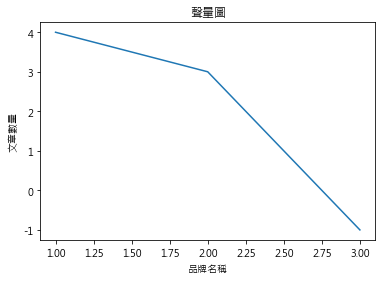

In [5]:
#我們測試一下，確定可以顯示中文
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

## 1-3.讀取測試資料與基本語法

In [26]:
Score = pd.read_excel("data/對戰成績.xlsx") #這是整體對戰成績表

In [27]:
display(Score.head(), #看前五筆資料
        Score.tail(), #看後五筆資料
        Score.shape) #了解整個 dataframe的資料範圍

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
0,陽明山盃,13:4,主,4.0,13.0,L,2021-10-30,藍閃,U12,NaN,1.0,NaN,郭教練,未晉級決賽,NaN,NaN
1,陽明山盃,1:7,主,7.0,1.0,W,2021-11-06,藍閃,U12,NaN,1.0,NaN,Vincent,未晉級決賽,NaN,NaN
2,主委盃,1:2,主,2.0,1.0,W,2021-10-30,敦化,U10,1.0,NaN,NaN,顏教練,亞軍,NaN,NaN
3,主委盃,1:10,主,1.0,10.0,L,2021-10-30,小小馬,U10,1.0,NaN,NaN,杜教練,亞軍,NaN,NaN
4,主委盃,1:2,主,2.0,1.0,W,2021-11-06,六家,U10,1.0,NaN,NaN,杜教練,亞軍,NaN,NaN


,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
64,全國社區學生棒球大賽,19:4,客,19.0,4.0,W,2022-08-13,水返腳,U12,NaN,1.0,NaN,杜教練,晉級16強,NaN,NaN
65,全國社區學生棒球大賽,4:1,主,1.0,4.0,L,2022-08-14,台中健行小牛,U12,NaN,1.0,NaN,杜教練,晉級16強,NaN,NaN
66,全國社區學生棒球大賽,對手棄賽(0:6),主,NaN,NaN,W,2022-08-20,澎湖追風少年,U12,NaN,NaN,NaN,杜教練,對手棄賽,NaN,NaN
67,全國社區學生棒球大賽,10:1,主,1.0,10.0,L,2022-08-21,三峽社區,U12,NaN,1.0,NaN,杜教練,晉級16強,NaN,NaN
68,彰化培英國小,9:6,客,9.0,6.0,W,2022-08-13,彰化培英國小,U12,NaN,1.0,NaN,杜教練,友誼賽,NaN,NaN


(69, 16)

In [7]:
Score.info() #列出變數基本資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Game         69 non-null     object        
 1   比數           69 non-null     object        
 2   主客           69 non-null     object        
 3   得分           68 non-null     float64       
 4   失分           68 non-null     float64       
 5   勝敗           69 non-null     object        
 6   Date         69 non-null     datetime64[ns]
 7   VSTeam       69 non-null     object        
 8   Level        69 non-null     object        
 9   潛力組          22 non-null     float64       
 10  少棒組          37 non-null     float64       
 11  Mini         9 non-null      float64       
 12  Coach        69 non-null     object        
 13  Note         67 non-null     object        
 14  Unnamed: 14  0 non-null      float64       
 15  Unnamed: 15  0 non-null      float64       
dtypes: datetim

## 1-4.整體勝敗分析

In [32]:
Score.describe() #基本統計量，僅會顯示屬量資料

,得分,失分,潛力組,少棒組,Mini,Unnamed: 14,Unnamed: 15
count,68.000000,68.000000,22.0,37.0,9.0,0.0,0.0
mean,7.294118,8.176471,1.0,1.0,1.0,NaN,NaN
std,6.797846,6.682437,0.0,0.0,0.0,NaN,NaN
min,0.000000,0.000000,1.0,1.0,1.0,NaN,NaN
25%,2.000000,3.750000,1.0,1.0,1.0,NaN,NaN
50%,5.000000,7.000000,1.0,1.0,1.0,NaN,NaN
75%,10.250000,11.000000,1.0,1.0,1.0,NaN,NaN
max,25.000000,30.000000,1.0,1.0,1.0,NaN,NaN


##### 所以該球隊平均得分為7.3分，但會失掉8.17分; 且得分之中位數為5分，失分之中位數為7分。且由上述我們想知道，得分最大值25分的是哪一支球隊? 失分最大值30分的又是哪個球隊?


In [9]:
Score[Score.得分>=20] #找出得分大於20分的場次

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
22,加蚋盃,24:19,客,24.0,19.0,W,2022-01-15,華興,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
24,加蚋盃,29:22,客,21.0,29.0,W,2022-01-15,藍閃,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
25,加蚋盃,13:24,主,24.0,13.0,W,2022-01-15,東園紅,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
29,加蚋盃,22:8,主,22.0,8.0,L,2022-01-16,海德社區,U10,NaN,NaN,1.0,郭教練,明日之星 U10,NaN,NaN
32,就是棒春季聯賽,6:23,主,23.0,6.0,W,2022-04-09,日僑雷公,U12,NaN,1.0,NaN,郭教練,例行賽,NaN,NaN
60,運動家盃,25:0,客,25.0,0.0,W,2022-08-06,金剛社區,U12,NaN,1.0,NaN,郭教練,A組亞軍,NaN,NaN


In [33]:
Score[Score.失分>=25] #找出失分大於25分的場次

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
23,加蚋盃,5:30,客,5.0,30.0,L,2022-01-15,東園,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
24,加蚋盃,29:22,客,21.0,29.0,W,2022-01-15,藍閃,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN


In [34]:
#這支球隊整年度贏幾場/敗幾場

Score['勝敗'].value_counts() #計算一下勝敗的分佈

L    37
W    32
Name: 勝敗, dtype: int64

## 1-5. U12/U10及主客場分析

In [35]:
#區分成兩個層級呢?勝敗關系為何?
Cross0 = pd.crosstab(Score['勝敗'], Score['Level']) #建立交叉列聯表
Cross0

Level,U10,U12
勝敗,,
L,19,18
W,12,20


In [8]:
#兩個Level的平均得失分

Score.groupby('Level').describe()


得分                                                   失分             \
      count      mean       std  min  25%  50%   75%   max count       mean   
Level                                                                         
U10    31.0  7.096774  7.147749  0.0  1.0  5.0  10.0  24.0  31.0  11.548387   
U12    37.0  7.459459  6.585314  0.0  2.0  6.0  10.0  25.0  37.0   5.351351   

       ... Unnamed: 14     Unnamed: 15                               
       ...         75% max       count mean std min 25% 50% 75% max  
Level  ...                                                           
U10    ...         NaN NaN         0.0  NaN NaN NaN NaN NaN NaN NaN  
U12    ...         NaN NaN         0.0  NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 56 columns]

#### [小結]: 
- U10組:平均得7.06分，失11.5分
- U12組:平均得7.46分，失5.35分

In [37]:
#主隊/客隊，在得分上有沒有差別
Score.pivot_table('得分', index='Level', columns='主客') #樞紐分析表 (數字內容為得分的平均數)

主客,主,客
Level,,
U10,6.117647,8.285714
U12,6.500000,8.588235


In [38]:
#主隊/客隊，在失分上有沒有差別
Score.pivot_table('失分', index='Level', columns='主客') #樞紐分析表 (數字內容為失分的平均數)

主客,主,客
Level,,
U10,9.941176,13.500000
U12,5.350000,5.352941


### 很明顯，
- U12，在得分/失分的衡量上，先攻(客隊)可以得到8.58分，失5.35分;
- U10，先攻(客隊)能得的分數多，但失分也多......GG。

In [45]:
#有沒有那種得分超多，或失分超多的比賽。簡稱打擊戰

Score[(Score.得分>=15) & (Score.失分>=15)] 

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
22,加蚋盃,24:19,客,24.0,19.0,W,2022-01-15,華興,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
24,加蚋盃,29:22,客,21.0,29.0,W,2022-01-15,藍閃,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN
26,加蚋盃,16:19,主,16.0,19.0,L,2022-01-15,光復,U10,NaN,NaN,1.0,家長,明日之星 U9 Minibaseball,NaN,NaN


#### <font color="#FF0000">嗯，果然拋打就是很嗨.....</font>

In [44]:
import seaborn as sns

[Text(0.5, 1.0, '不同層級失分箱型圖')]

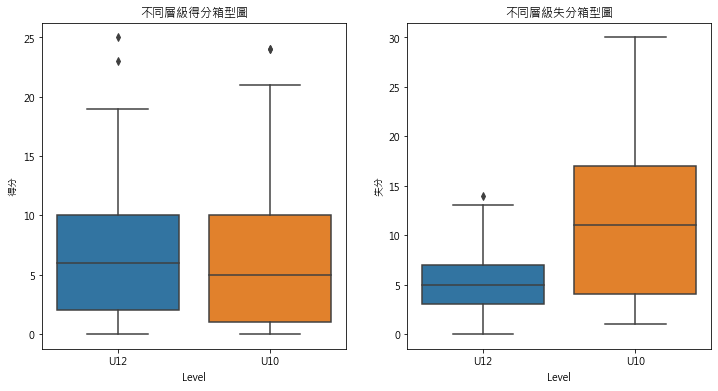

In [11]:
#得分與失分的資料視覺化

fig=plt.figure(figsize=[12,6])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.boxplot(x='Level',y='得分',data=Score,ax=ax1).set(title='不同層級得分箱型圖')
sns.boxplot(x='Level',y='失分',data=Score,ax=ax2).set(title='不同層級失分箱型圖')
#plt.title("不同層級得/失分箱型圖") # 圖的標題

In [41]:
#不同的教練，不同的戰術習慣，會比較能得分嗎?

Score.pivot_table('得分', index='Level', columns='Coach') #樞紐分析表 (數字內容為平均數)

Coach,Vincent,家長,杜教練,郭教練,顏教練
Level,,,,,
U10,3.75,17.333333,4.80,11.666667,3.230769
U12,7.00,NaN,6.75,7.678571,NaN


#### 見鬼了，郭教練帶U10超猛。顯然存在Bias..來看看郭教練帶過哪幾場U10


In [42]:
Score[(Score.Coach=='郭教練') & (Score.Level=='U10')] 

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
27,加蚋盃,11:9,客,11.0,9.0,W,2022-01-16,桃源,U10,NaN,NaN,1.0,郭教練,明日之星 U10,NaN,NaN
28,加蚋盃,10:16,主,16.0,10.0,W,2022-01-16,光芒,U10,NaN,NaN,1.0,郭教練,明日之星 U10,NaN,NaN
29,加蚋盃,22:8,主,8.0,22.0,L,2022-01-16,海德社區,U10,NaN,NaN,1.0,郭教練,明日之星 U10,NaN,NaN


### [課堂作業]. 請利用上述練習的程式碼，自行修改。題目如下:
- 我想知道面對傳統強隊: 東園、海德...(請自行定義)，我們勝敗的場次與得失分
- 沒有標準作業程序，你可以自己亂發揮，找得到答案就好

## 1-6. 整體資料拆分作業
- 往後可能會需要進行檔案的Merge，
- 因此為了後續分析作業，我們將Score資料拆成兩個U10/U12的檔案集 

In [28]:
U12_Score=Score[Score.Level=='U12'] #找出U12的資料
U10_Score=Score[Score.Level=='U10'] #找出U10的資料

In [7]:
U12_Score.head()

,Game,比數,主客,得分,失分,勝敗,Date,VSTeam,Level,潛力組,少棒組,Mini,Coach,Note,Unnamed: 14,Unnamed: 15
0,陽明山盃,13:4,主,4.0,13.0,L,2021-10-30,藍閃,U12,NaN,1.0,NaN,郭教練,未晉級決賽,NaN,NaN
1,陽明山盃,1:7,主,7.0,1.0,W,2021-11-06,藍閃,U12,NaN,1.0,NaN,Vincent,未晉級決賽,NaN,NaN
9,就是棒,12:3,客,12.0,3.0,W,2021-10-02,HEAT,U12,NaN,1.0,NaN,郭教練,預賽,NaN,NaN
10,就是棒,2:10,主,10.0,2.0,W,2021-10-02,三星,U12,NaN,1.0,NaN,郭教練,預賽,NaN,NaN
11,就是棒,4:13,主,13.0,4.0,W,2021-10-30,港湖藍,U12,NaN,1.0,NaN,郭教練,預賽,NaN,NaN


In [29]:
Cross1 = pd.crosstab(index=[Score['VSTeam'], Score['Level'], Score['比數']],
                    columns=[Score["勝敗"] ])

pd.set_option('display.max_rows', None)#表格太長，設定中間不要省略

Cross1


勝敗                      L  W
VSTeam Level 比數             
HEAT   U12   12:3       0  1
             19:7       0  1
KEEP   U10   11:7       1  0
Monga  U10   19:4       1  0
             8:2        0  1
TPE    U12   0:10       0  1
WBC    U10   5:17       1  0
             9:4        0  1
       U12   1:2        0  1
WHB    U10   15:0       1  0
             1:11       1  0
       U12   0:7        1  0
             14:10      1  0
             1:4        1  0
             8:3        1  0
三峽社區   U10   4:9        0  1
       U12   10:1       1  0
三星     U12   2:10       0  1
中大紅襪   U10   0:15       1  0
中大蜥蜴   U10   13:4       0  1
光復     U10   14:1       1  0
             16:19      1  0
       U12   15:11      0  1
光芒     U10   10:16      0  1
六家     U10   1:2        0  1
台中健行小牛 U12   4:1        1  0
基隆家扶   U10   3:4        0  1
大日家扶   U12   7:3        1  0
小小馬    U10   17:2       1  0
             1:10       1  0
             7:0        1  0
彰化培英國小 U12   9:6        0  1
敦化     U10   1:2        0  1
       U12   4:3        1  0
             7:2        1  0
             8:2        1  0
日僑雷公   U12   6:23       0  1
東園     U10   5:30       1  0
東園紅    U10   13:24      0  1
桃園長庚   U12   2:3        0  1
桃源     U10   11:9       0  1
             14:21      1  0
水返腳    U12   19:4       0  1
             3:14       0  1
波特     U12   9:0        0  1
波特少棒   U12   2:6X       0  1
活力社區   U12   2:4        1  0
海德社區   U10   22:8       1  0
             3:1        1  0
       U12   9:8        1  0
港湖紅    U12   1:11       1  0
港湖藍    U12   4:13       0  1
澎湖追風少年 U12   對手棄賽(0:6)  0  1
火山     U12   5:6X       1  0
             6:5        0  1
             6:7        1  0
火山_潛   U10   0:2        1  0
火焰勇士   U12   14:4       0  1
秀朗巨星   U12   3:6        1  0
華興     U10   24:19      0  1
藍閃     U10   29:22      0  1
       U12   13:4       1  0
             1:7        0  1
親子勇士   U10   11:7       1  0
運動家    U12   2:5        0  1
金剛社區   U12   25:0       0  1
高雄鼓岩   U12   0:6        1  0
魔法師    U10   1:7        1  0
黑豹     U10   8:4        1  0

- WHB、海德社區	是天敵(U12/U10都沒贏過)
- 小小馬 U10沒贏過
- 敦化，U12沒贏過

In [9]:
pd.reset_option("^display")#將display.max_rows恢復原本設定

In [30]:
#另存成CSV，備用
U12_Score.to_csv('output/U12_Score.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8
U10_Score.to_csv('output/U10_Score.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

># Part 2: 打擊篇

## 2-1.資料整備與aggregate

In [108]:
U12_Bat = pd.read_excel("data/U12_Bat.xlsx") #這是U12球員打擊成績
U10_Bat = pd.read_excel("data/U10_Bat.xlsx") #這是U10球員打擊成績

In [32]:
#兩組 dataframe的資料範圍
display(U10_Bat.shape, 
        U12_Bat.shape) #了解整個 dataframe的資料範圍

(249, 28)

(437, 28)

In [68]:
#因為兩組 dataframe的變數名稱與欄位都相同，所以我們秀一組就好
U12_Bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      437 non-null    int64         
 1   Name    437 non-null    object        
 2   Level   437 non-null    object        
 3   date    437 non-null    datetime64[ns]
 4   VSTeam  437 non-null    object        
 5   Start   333 non-null    float64       
 6   G       437 non-null    int64         
 7   PA      437 non-null    int64         
 8   AB      437 non-null    int64         
 9   R       437 non-null    int64         
 10  H       437 non-null    int64         
 11  B       437 non-null    int64         
 12  1B      437 non-null    int64         
 13  2B      437 non-null    int64         
 14  3B      437 non-null    int64         
 15  HR      437 non-null    int64         
 16  RBI     437 non-null    int64         
 17  AVG     408 non-null    float64       
 18  BB      43

In [33]:
U10_Bat.sample(n=10)   #隨機抽取10筆數據出來看看

,ID,Name,Level,date,VSTeam,Start,G,PA,AB,R,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
88,38,吳喆洺,U10,2022-07-02,WHB,NaN,1,1,1,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
29,16,張有慕,U10,2022-07-03,中大蜥蜴,1.0,1,2,2,2,...,0,0,0,0,0,0,0,0.0,0.0,0.0
94,43,鄭鈞愷,U10,2021-11-13,基隆家扶,1.0,1,3,1,1,...,1,0,0,0,1,0,0,0.0,0.0,0.0
184,64,許彥鵬,U10,2022-08-06,三峽社區,1.0,1,3,2,2,...,1,0,0,0,0,0,0,0.0,0.0,0.0
33,16,張有慕,U10,2022-03-19,WBC,1.0,1,3,2,2,...,1,0,0,0,0,0,1,NaN,NaN,NaN
185,64,許彥鵬,U10,2022-08-07,火山,1.0,1,2,2,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
49,24,許立霖,U10,2022-08-06,中大紅襪,1.0,1,2,1,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0
172,59,張淳博,U10,2022-07-03,中大蜥蜴,1.0,1,3,3,2,...,0,0,0,0,0,0,0,0.0,0.0,0.0
67,25,施昶宇,U10,2022-03-19,WBC,1.0,1,2,0,0,...,2,0,0,0,0,0,0,NaN,NaN,NaN
138,50,黃羿齊,U10,2022-03-19,WBC,1.0,1,3,2,2,...,1,0,0,0,0,0,0,NaN,NaN,NaN


### <font color="#FF0000">補充: 分析層級的觀念</font>
- 不同的分析單位，會對應不同的分析問題。
    - 舉例來說，你要分析的是台北市的12個"行政區"，還是要分析的是北北基桃的"城市"共榮
    - 舉例來說，你想知道的每一場次的打擊率，還是整年度的打擊王
- 因此，如果我們想知道"年度成績"，那麼
    - 現在的單一個dataframe指的是個人"每一場次"的成績，我們要將其彙整成個人"年度成績"
    - 也就是說我們需要將現有的資料集aggregate上去一個層級

In [109]:
U12_aggbat = U12_Bat.groupby('Name').agg({'Start':'sum', 
                         'G':'sum', 
                         'PA':'sum', 
                         'AB':'sum',
                          'R':'sum',
                          'H':'sum',
                          'B':'sum',
                          '1B':'sum',
                          '2B':'sum',
                          '3B':'sum',
                          'HR':'sum',
                          'RBI':'sum',
                          'BB':'sum',
                          'Kc':'sum',
                          'Ks':'sum',
                          'SO':'sum',
                          'HBP':'sum',
                          'SB':'sum',
                          'CS':'sum',
                          'SCB':'sum',
                          'SF':'sum',
                          'SAC':'sum'   }).reset_index() #加入reset_index()是為了將index保留(Name)

U12_aggbat.shape

(25, 23)

In [110]:
U12_aggbat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    25 non-null     object 
 1   Start   25 non-null     float64
 2   G       25 non-null     int64  
 3   PA      25 non-null     int64  
 4   AB      25 non-null     int64  
 5   R       25 non-null     int64  
 6   H       25 non-null     int64  
 7   B       25 non-null     int64  
 8   1B      25 non-null     int64  
 9   2B      25 non-null     int64  
 10  3B      25 non-null     int64  
 11  HR      25 non-null     int64  
 12  RBI     25 non-null     int64  
 13  BB      25 non-null     int64  
 14  Kc      25 non-null     int64  
 15  Ks      25 non-null     int64  
 16  SO      25 non-null     int64  
 17  HBP     25 non-null     int64  
 18  SB      25 non-null     int64  
 19  CS      25 non-null     float64
 20  SCB     25 non-null     float64
 21  SF      25 non-null     float64
 22  SAC 

In [111]:
U12_aggbat.sort_values(by=["PA"], ascending=False) #按照PA，由大排到小

,Name,Start,G,PA,AB,R,H,B,1B,2B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
17,田定元,28.0,31,80,62,37,28,0,17,5,...,11,2,5,7,7,20,0.0,0.0,0.0,0.0
14,杜翊嘉,28.0,32,72,57,19,16,0,9,5,...,15,6,18,24,0,18,2.0,0.0,0.0,0.0
20,許鈞翔,24.0,32,71,52,24,17,0,17,0,...,16,1,5,6,3,20,1.0,0.0,0.0,0.0
2,吳喆鎧,25.0,27,70,47,24,18,0,11,4,...,11,2,8,10,10,14,0.0,0.0,0.0,0.0
13,李雨鴻,25.0,30,69,55,17,19,0,12,6,...,12,0,18,18,1,16,1.0,1.0,0.0,1.0
15,林軒愷,23.0,30,69,46,26,19,0,12,4,...,17,2,6,8,5,19,2.0,0.0,0.0,0.0
19,袁相然,24.0,30,68,54,28,24,0,20,2,...,11,2,4,6,3,26,0.0,0.0,0.0,0.0
11,李泓毅,22.0,26,62,48,25,17,0,12,3,...,14,3,8,11,0,21,0.0,0.0,0.0,0.0
8,施博允,25.0,31,59,43,18,9,0,6,2,...,11,3,19,22,5,15,1.0,0.0,0.0,0.0
10,曾少寬,21.0,28,52,44,9,6,0,6,0,...,6,1,10,11,0,4,0.0,1.0,0.0,1.0


好的，看起來U12的部分沒有問題，我們把U10也作一作吧。。。。。。

In [112]:
U10_aggbat = U10_Bat.groupby('Name').agg({'Start':'sum', 
                         'G':'sum', 
                         'PA':'sum', 
                         'AB':'sum',
                          'R':'sum',
                          'H':'sum',
                          'B':'sum',
                          '1B':'sum',
                          '2B':'sum',
                          '3B':'sum',
                          'HR':'sum',
                          'RBI':'sum',
                          'BB':'sum',
                          'Kc':'sum',
                          'Ks':'sum',
                          'SO':'sum',
                          'HBP':'sum',
                          'SB':'sum', 
                           'CS':'sum',
                          'SCB':'sum',
                          'SF':'sum',
                          'SAC':'sum'  }).reset_index()

U10_aggbat.shape

(21, 23)

In [113]:
U10_aggbat = U10_aggbat.rename(columns={'1B': 'H1B'})#將欄位名稱"1B"修改為"H1B"
U10_aggbat = U10_aggbat.rename(columns={'2B': 'H2B'})
U10_aggbat = U10_aggbat.rename(columns={'3B': 'H3B'})



In [114]:
U12_aggbat = U12_aggbat.rename(columns={'1B': 'H1B'})#將欄位名稱"1B"修改為"H1B"
U12_aggbat = U12_aggbat.rename(columns={'2B': 'H2B'})
U12_aggbat = U12_aggbat.rename(columns={'3B': 'H3B'})

In [21]:
U10_aggbat.head()

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
0,劉展綸,15.0,18,34,29,4,9,0,6,2,...,3,4,10,14,2,1,1,0.0,0.0,0.0
1,劉禹亨,1.0,1,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0.0,0.0,0.0
2,吳喆洺,1.0,2,3,2,0,0,0,0,0,...,1,0,2,2,0,0,0,0.0,0.0,0.0
3,吳宣辰,13.0,19,32,19,6,1,0,0,0,...,12,3,7,10,1,0,1,0.0,0.0,0.0
4,張有慕,16.0,17,38,28,11,10,0,7,3,...,9,2,9,11,1,2,1,0.0,0.0,0.0


In [115]:
#順便教一下把整理好的dataframe存出來，以後就不用每次都要整理，很煩

U12_aggbat.to_csv('output/U12_aggbat.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8
U10_aggbat.to_csv('output/U10_aggbat.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

## 2-2. 各項攻擊指標計算

### [賽伯計量學]基礎指標

- 除了我們很顯而易見的: 打擊率王、安打王、全壘打王、盜壘王、打點王....之外
- 賽伯計量學告訴我們: OBP、SLG、OPS、OPS+、BB%....也很重要


### [公式說明]
1.一般而言，常用的打擊三圍分別代表: 打擊率/上壘率/長打率
- 打擊率(AVG)：安打 ÷ 打數
- 上壘率(OBP)：（安打 + 四死球） ÷ （打數 + 四死球 + 高飛犧牲打）
- 長打率(SLG)：壘打數 ÷ 打數

2.其中，壘打數(TB)的計算方式是：一壘打 x 1 + 二壘打 × 2 + 三壘打 × 3 + 全壘打 × 4



## 2-2-1. U10的攻擊指標

In [116]:
U10_aggbat01 = pd.read_csv("output/U10_aggbat.csv") #讀取.csv

In [6]:
U10_aggbat01.shape

(21, 23)

In [7]:
U10_aggbat01.sample(n=10)   #隨機抽取10筆數據出來看看

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
11,游日誠,10.0,12,18,16,0,2,0,2,0,...,2,2,9,11,0,0,0,0.0,0.0,0.0
0,劉展綸,15.0,18,34,29,4,9,0,6,2,...,3,4,10,14,2,1,1,0.0,0.0,0.0
18,陳諭辰,8.0,10,18,14,4,1,0,1,0,...,3,1,5,6,1,1,0,0.0,0.0,0.0
9,李靖棠,2.0,4,3,2,0,0,0,0,0,...,0,0,2,2,1,0,0,0.0,0.0,0.0
3,吳宣辰,13.0,19,32,19,6,1,0,0,0,...,12,3,7,10,1,0,1,0.0,0.0,0.0
13,田定弘,1.0,5,5,4,0,0,0,0,0,...,0,0,3,3,1,0,0,0.0,0.0,0.0
4,張有慕,16.0,17,38,28,11,10,0,7,3,...,9,2,9,11,1,2,1,0.0,0.0,0.0
15,許立霖,4.0,9,12,7,1,0,0,0,0,...,4,1,3,4,1,0,0,0.0,0.0,0.0
20,黃羿齊,20.0,20,50,37,15,8,0,7,1,...,11,2,4,6,2,2,1,0.0,0.0,0.0
7,施竑志,13.0,14,28,24,6,4,0,1,1,...,4,0,8,8,0,2,1,0.0,0.0,0.0


In [8]:
U10_aggbat01.describe() #基本統計量

,Start,G,PA,AB,R,H,B,H1B,H2B,H3B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000
mean,9.428571,11.857143,22.190476,16.619048,3.857143,3.000000,0.0,2.190476,0.619048,0.142857,...,4.809524,1.619048,6.000000,7.619048,0.666667,0.714286,0.285714,0.095238,0.0,0.095238
std,6.177147,6.191007,14.548605,11.723806,4.574776,4.086563,0.0,3.026864,1.116969,0.358569,...,3.816006,1.321975,2.932576,3.943047,0.658281,1.101946,0.462910,0.436436,0.0,0.436436
min,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.000000,6.000000,11.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,2.000000,1.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,10.000000,14.000000,21.000000,16.000000,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,...,4.000000,1.000000,6.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,13.000000,18.000000,32.000000,24.000000,6.000000,4.000000,0.0,2.000000,1.000000,0.000000,...,7.000000,3.000000,8.000000,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000
max,20.000000,20.000000,50.000000,42.000000,15.000000,14.000000,0.0,10.000000,4.000000,1.000000,...,12.000000,4.000000,11.000000,14.000000,2.000000,4.000000,1.000000,2.000000,0.0,2.000000


In [41]:
print('平均打席PA:',U10_aggbat01.PA.mean()) 
print('平均打數AB:' , U10_aggbat01.AB.mean())
print('平均安打H:',U10_aggbat01.H.mean())

平均打席PA: 22.19047619047619
平均打數AB: 16.61904761904762
平均安打H: 3.0


In [42]:
#我們先來看看基本數據所能告訴我們的那些"王"

print('U10得分王:',U10_aggbat01.R.max()) 
print('U10安打王:' , U10_aggbat01.H.max())
print('U10打點王:',U10_aggbat01.RBI.max())
print('U10盜壘王:',U10_aggbat01.SB.max())

U10_aggbat01.loc[:,["Name","R","H","RBI","SB"]] 
#.loc是用來選擇特定的[(index名稱),(columns名稱)]
#所以你可以看出":"是將index列出 

U10得分王: 15
U10安打王: 14
U10打點王: 9
U10盜壘王: 4


,Name,R,H,RBI,SB
0,劉展綸,4,9,9,1
1,劉禹亨,0,0,0,0
2,吳喆洺,0,0,0,0
3,吳宣辰,6,1,4,0
4,張有慕,11,10,8,2
5,張淳博,14,14,4,4
6,施昶宇,0,2,1,0
7,施竑志,6,4,7,2
8,朱宸揚,2,1,1,0
9,李靖棠,0,0,0,0


[Text(0.5, 1.0, '盜壘王')]

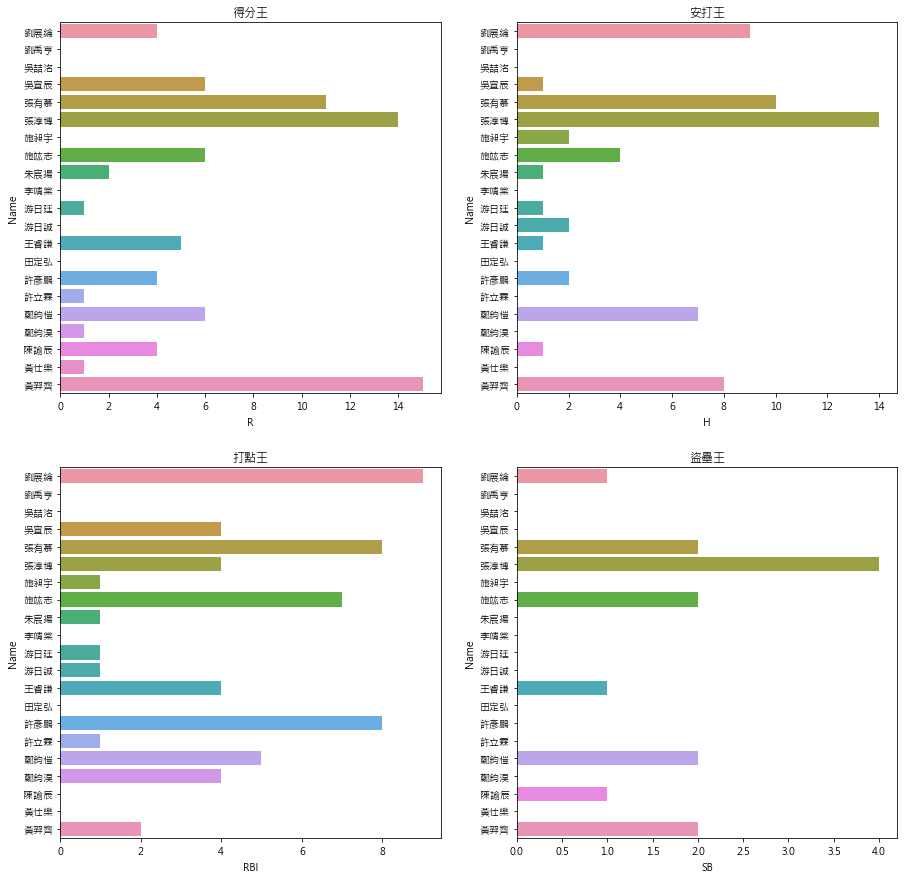

In [45]:
fig=plt.figure(figsize=[15,15])
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.barplot(x="R", y="Name", data=U10_aggbat01,ax=ax1).set(title='得分王')
sns.barplot(x="H", y="Name", data=U10_aggbat01,ax=ax2).set(title='安打王')
sns.barplot(x="RBI", y="Name", data=U10_aggbat01,ax=ax3).set(title='打點王')
sns.barplot(x="SB", y="Name", data=U10_aggbat01,ax=ax4).set(title='盜壘王')

### [課堂練習] 鍵盤總教練1
- 你很直覺的就會想把羿齊排在第一棒，然後淳博、展綸一定是中心棒次。
- 但有慕、彥鵬、紘志，看起來異軍突起阿
- 你會怎麼排棒次?

In [117]:
#先算壘打數(TB)的計算方式是：一壘打 x 1 + 二壘打 × 2 + 三壘打 × 3 + 全壘打 × 4

U10_aggbat01["TB"] = U10_aggbat01.H1B*1 + U10_aggbat01.H2B*2+U10_aggbat01.H3B*3+U10_aggbat01.HR*4

U10_aggbat01.sort_values(by=["TB"], ascending=False) #按照TB，由大排到小

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC,TB
5,張淳博,18.0,18,47,42,14,14,0,10,4,...,3,8,11,1,4,0,0.0,0.0,0.0,18
0,劉展綸,15.0,18,34,29,4,9,0,6,2,...,4,10,14,2,1,1,0.0,0.0,0.0,13
4,張有慕,16.0,17,38,28,11,10,0,7,3,...,2,9,11,1,2,1,0.0,0.0,0.0,13
7,施竑志,13.0,14,28,24,6,4,0,1,1,...,0,8,8,0,2,1,0.0,0.0,0.0,10
20,黃羿齊,20.0,20,50,37,15,8,0,7,1,...,2,4,6,2,2,1,0.0,0.0,0.0,9
16,鄭鈞愷,18.0,18,40,29,6,7,0,6,1,...,3,6,9,1,2,1,2.0,0.0,2.0,8
3,吳宣辰,13.0,19,32,19,6,1,0,0,0,...,3,7,10,1,0,1,0.0,0.0,0.0,3
14,許彥鵬,12.0,14,30,22,4,2,0,1,1,...,1,8,9,1,0,0,0.0,0.0,0.0,3
6,施昶宇,11.0,18,21,17,0,2,0,2,0,...,4,7,11,0,0,0,0.0,0.0,0.0,2
11,游日誠,10.0,12,18,16,0,2,0,2,0,...,2,9,11,0,0,0,0.0,0.0,0.0,2


我們需要哪些指標，稍微寫一下避免忘記
- H:安打
- AB:打數
- BB:四死球
- SF:高飛犧牲打

In [118]:
#打擊率(AVG)：安打 ÷ 打數
#上壘率(OBP)：（安打 + 四死球） ÷ （打數 + 四死球 + 高飛犧牲打）
#長打率(SLG)：壘打數 ÷ 打數

U10_aggbat01["AVG"] = U10_aggbat01.H / U10_aggbat01.AB
U10_aggbat01["OBP"] = (U10_aggbat01.H + U10_aggbat01.BB) / (U10_aggbat01.AB + U10_aggbat01.BB + U10_aggbat01.SF)
U10_aggbat01["SLG"] = U10_aggbat01.TB / U10_aggbat01.AB

U10_aggbat02=U10_aggbat01.sort_values(by=["OBP"], ascending=False) #按照上壘率(OBP)，由大排到小。並存檔為02
U10_aggbat02[U10_aggbat02.PA>=22] #找出PA大於平均數的打者數據

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,HBP,SB,CS,SCB,SF,SAC,TB,AVG,OBP,SLG
4,張有慕,16.0,17,38,28,11,10,0,7,3,...,1,2,1,0.0,0.0,0.0,13,0.357143,0.513514,0.464286
17,鄭鈞淏,10.0,17,25,13,1,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0.000000,0.480000,0.000000
3,吳宣辰,13.0,19,32,19,6,1,0,0,0,...,1,0,1,0.0,0.0,0.0,3,0.052632,0.419355,0.157895
16,鄭鈞愷,18.0,18,40,29,6,7,0,6,1,...,1,2,1,2.0,0.0,2.0,8,0.241379,0.405405,0.275862
20,黃羿齊,20.0,20,50,37,15,8,0,7,1,...,2,2,1,0.0,0.0,0.0,9,0.216216,0.395833,0.243243
5,張淳博,18.0,18,47,42,14,14,0,10,4,...,1,4,0,0.0,0.0,0.0,18,0.333333,0.391304,0.428571
0,劉展綸,15.0,18,34,29,4,9,0,6,2,...,2,1,1,0.0,0.0,0.0,13,0.310345,0.375000,0.448276
14,許彥鵬,12.0,14,30,22,4,2,0,1,1,...,1,0,0,0.0,0.0,0.0,3,0.090909,0.310345,0.136364
7,施竑志,13.0,14,28,24,6,4,0,1,1,...,0,2,1,0.0,0.0,0.0,10,0.166667,0.285714,0.416667
12,王睿謙,12.0,14,25,19,5,1,0,1,0,...,1,1,0,0.0,0.0,0.0,1,0.052632,0.250000,0.052632


In [11]:
# 有沒有遺珠
U10_aggbat02[U10_aggbat02.PA<=22] #找出PA大於平均數的打者數據

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,HBP,SB,CS,SCB,SF,SAC,TB,AVG,OBP,SLG
8,朱宸揚,3.0,6,11,6,2,1,0,1,0,...,0,0,0,0.0,0.0,0.0,1,0.166667,0.545455,0.166667
19,黃仕樂,7.0,8,15,9,1,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0.000000,0.400000,0.000000
15,許立霖,4.0,9,12,7,1,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0,0.000000,0.363636,0.000000
2,吳喆洺,1.0,2,3,2,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0.000000,0.333333,0.000000
6,施昶宇,11.0,18,21,17,0,2,0,2,0,...,0,0,0,0.0,0.0,0.0,2,0.117647,0.285714,0.117647
18,陳諭辰,8.0,10,18,14,4,1,0,1,0,...,1,1,0,0.0,0.0,0.0,1,0.071429,0.235294,0.071429
11,游日誠,10.0,12,18,16,0,2,0,2,0,...,0,0,0,0.0,0.0,0.0,2,0.125000,0.222222,0.125000
10,游日廷,3.0,5,9,8,1,1,0,1,0,...,0,0,0,0.0,0.0,0.0,1,0.125000,0.222222,0.125000
9,李靖棠,2.0,4,3,2,0,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000
1,劉禹亨,1.0,1,2,2,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000


1.我們已經有基本的打擊三圍。在本篇，我們會加入: 
- 整體攻擊指數(OPS): 上壘率（OBP）+ 長打率（SLG）
- 標準化攻擊指數(OPS＋): 100*[(球員上壘率/聯盟上壘率)+(球員長打率/聯盟長打率)-1]

2.由於聯盟上壘率、聯盟長打率並無法得知，因此我們以"本球隊上壘率"、"本球隊長打率"替代

In [45]:
#我們需要整隊的平均上壘率與平均長打率
print('整體平均上壘率:',U10_aggbat01.OBP.mean()) #整體平均上壘率
print('整體平均上壘率:',U10_aggbat01.SLG.mean() ) #整體平均長打率

整體平均上壘率: 0.30639750677707334
整體平均上壘率: 0.15378748727968636


In [119]:
U10_aggbat02["OPS"] = U10_aggbat02.OBP + U10_aggbat02.SLG #計算OPS
U10_aggbat02["OPS_Plus"] = (U10_aggbat02.OBP/0.3064)+(U10_aggbat02.SLG/0.1538)-1 #計算OPS+
U10_aggbat02["BB_per"] = U10_aggbat02.BB/U10_aggbat02.PA #誰有選球眼

#我想知道PA超過22且 OPS＋ 大於1的隊友
U10_aggbat02=U10_aggbat02.loc[:,["Name","G","PA","AB","R","H","TB","AVG",
                                 "OBP","SLG","OPS","OPS_Plus","BB_per"]] 
U10_aggbat02.sort_values(by=["OPS_Plus"], ascending=False) #按照OPS_Plus，由大排到小



,Name,G,PA,AB,R,H,TB,AVG,OBP,SLG,OPS,OPS_Plus,BB_per
4,張有慕,17,38,28,11,10,13,0.357143,0.513514,0.464286,0.977799,3.694721,0.236842
0,劉展綸,18,34,29,4,9,13,0.310345,0.375000,0.448276,0.823276,3.138558,0.088235
5,張淳博,18,47,42,14,14,18,0.333333,0.391304,0.428571,0.819876,3.063653,0.085106
7,施竑志,14,28,24,6,4,10,0.166667,0.285714,0.416667,0.702381,2.641634,0.142857
16,鄭鈞愷,18,40,29,6,7,8,0.241379,0.405405,0.275862,0.681267,2.116766,0.200000
20,黃羿齊,20,50,37,15,8,9,0.216216,0.395833,0.243243,0.639077,1.873440,0.220000
8,朱宸揚,6,11,6,2,1,1,0.166667,0.545455,0.166667,0.712121,1.863863,0.454545
3,吳宣辰,19,32,19,6,1,3,0.052632,0.419355,0.157895,0.577250,1.395275,0.375000
14,許彥鵬,14,30,22,4,2,3,0.090909,0.310345,0.136364,0.446708,0.899504,0.233333
6,施昶宇,18,21,17,0,2,2,0.117647,0.285714,0.117647,0.403361,0.697423,0.190476


In [120]:
U10_aggbat02.to_csv('output/U10_aggbat02.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

In [50]:
U10_aggbat01_modified=U10_aggbat01.set_index("Name") #將原始的index設定為以 Name為index

In [75]:
print('U10得分王:',U10_aggbat01_modified.R.idxmax(),'/總得分為:',U10_aggbat01_modified.R.max())
print('U10安打王:' ,U10_aggbat01_modified.H.idxmax() ,'/安打數為:',U10_aggbat01_modified.H.max())
print('U10打點王:',U10_aggbat01_modified.RBI.idxmax(),'/總打點為:',U10_aggbat01_modified.RBI.max())
print('U10盜壘王:',U10_aggbat01_modified.SB.idxmax(),'/盜壘次數為:',U10_aggbat01_modified.SB.max())
print('U10打擊王:',U10_aggbat01_modified.AVG.idxmax(),'/打擊率為:',U10_aggbat01_modified.AVG.max())
print('U10上壘率王:',U10_aggbat01_modified.OBP.idxmax(),'/上壘率為:',U10_aggbat01_modified.OBP.max())
print('U10攻擊指數最高(OPS+):',U10_aggbat01_modified.OPS_Plus.idxmax(),'/OPS+為:',U10_aggbat01_modified.OPS_Plus.max())
print('U10保送王:',U10_aggbat01_modified.BB_per.idxmax(),'/BB%為:',U10_aggbat01_modified.BB_per.max())

U10得分王: 黃羿齊 /總得分為: 15
U10安打王: 張淳博  /安打數為: 14
U10打點王: 劉展綸  /總打點為: 9
U10盜壘王: 張淳博  /盜壘次數為: 4
U10打擊王: 張有慕 /打擊率為: 0.35714285714285715
U10上壘率王: 朱宸揚 /上壘率為: 0.5454545454545454
U10攻擊指數最高(OPS+): 張有慕 /OPS+為: 3.69472071396513
U10保送王: 鄭鈞淏 /BB%為: 0.48


### 我們來畫個圖吧! 讓總教練比較好判斷
- 一般觀念來說，前段棒次需要上壘，中心棒次需要負責打回來。
- 但我們沒有得點圈打擊率的進階數據，因此如果我們用OBP跟OPS+來進行作圖，會不會讓教練團有更好的判斷依據。

In [27]:
import seaborn as sns

[Text(0.5, 1.0, '盜壘王')]

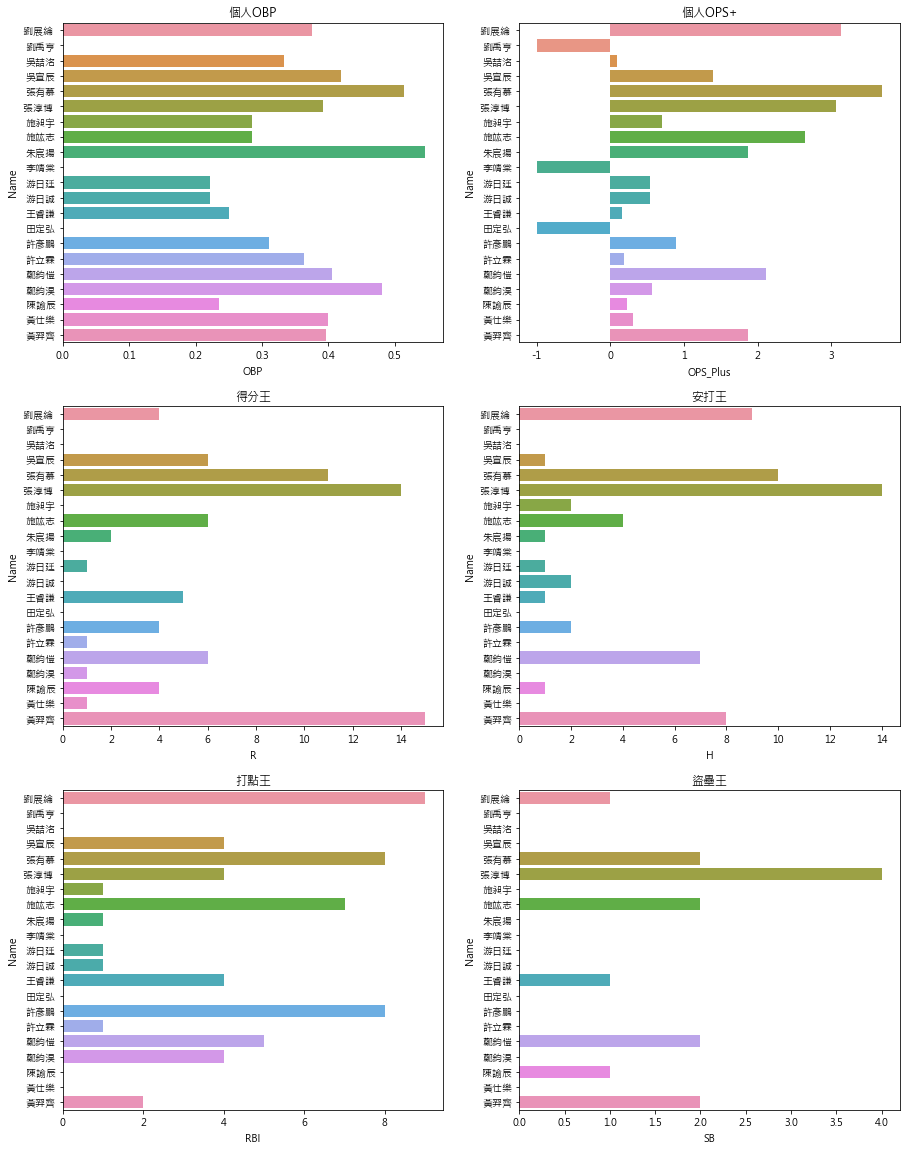

In [76]:
fig=plt.figure(figsize=[15,20])
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

sns.barplot(x="OBP", y="Name", data=U10_aggbat01,ax=ax1).set(title='個人OBP')
sns.barplot(x="OPS_Plus", y="Name", data=U10_aggbat01,ax=ax2).set(title='個人OPS+')
sns.barplot(x="R", y="Name", data=U10_aggbat01,ax=ax3).set(title='得分王')
sns.barplot(x="H", y="Name", data=U10_aggbat01,ax=ax4).set(title='安打王')
sns.barplot(x="RBI", y="Name", data=U10_aggbat01,ax=ax5).set(title='打點王')
sns.barplot(x="SB", y="Name", data=U10_aggbat01,ax=ax6).set(title='盜壘王')

#但需要特別注意PA的數據喔

## 2-2-2. U12的攻擊指標

In [121]:
U12_aggbat01 = pd.read_csv("output/U12_aggbat.csv") #讀取.csv

In [122]:
U12_aggbat01.sample(n=10)   #隨機抽取10筆數據出來看看

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
23,韓予樂,7.0,10,19,12,5,2,0,2,0,...,7,2,3,5,0,3,0.0,0.0,0.0,0.0
16,王韋銘,3.0,8,11,8,4,0,0,0,0,...,3,0,1,1,0,2,0.0,0.0,0.0,0.0
21,謝博兆,2.0,3,7,5,3,2,0,1,1,...,2,0,1,1,0,1,0.0,0.0,0.0,0.0
24,黃羿齊,1.0,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0.0,0.0,0.0,0.0
22,鄭鈞愷,8.0,12,20,15,3,2,0,2,0,...,3,0,8,8,2,4,0.0,0.0,0.0,0.0
2,吳喆鎧,25.0,27,70,47,24,18,0,11,4,...,11,2,8,10,10,14,0.0,0.0,0.0,0.0
20,許鈞翔,24.0,32,71,52,24,17,0,17,0,...,16,1,5,6,3,20,1.0,0.0,0.0,0.0
15,林軒愷,23.0,30,69,46,26,19,0,12,4,...,17,2,6,8,5,19,2.0,0.0,0.0,0.0
11,李泓毅,22.0,26,62,48,25,17,0,12,3,...,14,3,8,11,0,21,0.0,0.0,0.0,0.0
19,袁相然,24.0,30,68,54,28,24,0,20,2,...,11,2,4,6,3,26,0.0,0.0,0.0,0.0


In [22]:
U12_aggbat01.describe() #基本統計量

,Start,G,PA,AB,R,H,B,H1B,H2B,H3B,...,BB,Kc,Ks,SO,HBP,SB,CS,SCB,SF,SAC
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.0,25.000000,25.000000,25.000000,...,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000
mean,13.320000,17.480000,35.520000,26.640000,11.04000,7.720000,0.0,5.600000,1.320000,0.440000,...,6.800000,1.32,6.320000,7.640000,1.720000,8.480000,0.400000,0.080000,0.0,0.080000
std,10.294497,11.797316,28.766474,21.861077,11.12235,8.983874,0.0,6.311365,1.973153,0.916515,...,5.795113,1.60,5.836095,6.963476,2.557994,8.495685,0.707107,0.276887,0.0,0.276887
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.000000,8.000000,11.000000,8.000000,1.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,2.000000,0.00,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,11.000000,16.000000,27.000000,19.000000,6.00000,2.000000,0.0,2.000000,0.000000,0.000000,...,6.000000,1.00,5.000000,6.000000,1.000000,4.000000,0.000000,0.000000,0.0,0.000000
75%,24.000000,30.000000,68.000000,47.000000,19.00000,17.000000,0.0,11.000000,2.000000,1.000000,...,11.000000,2.00,8.000000,10.000000,2.000000,16.000000,1.000000,0.000000,0.0,0.000000
max,28.000000,32.000000,80.000000,62.000000,37.00000,28.000000,0.0,20.000000,6.000000,4.000000,...,17.000000,6.00,19.000000,24.000000,10.000000,26.000000,2.000000,1.000000,0.0,1.000000


In [41]:
print('平均打席PA:',U12_aggbat01.PA.mean()) 
print('平均打數AB:' , U12_aggbat01.AB.mean())
print('平均安打H:',U12_aggbat01.H.mean())

平均打席PA: 35.52
平均打數AB: 26.64
平均安打H: 7.72


In [52]:
#我們先來看看基本數據所能告訴我們的那些"王"

print('得分王:' , U12_aggbat01.R.max())
print('安打王:' , U12_aggbat01.H.max())
print('打點王:',U12_aggbat01.RBI.max())
print('盜壘王:',U12_aggbat01.SB.max())

U12_aggbat01.loc[:,["Name","R","H","RBI","SB"]] 
#.loc是用來選擇特定的[(index名稱),(columns名稱)]
#所以你可以看出":"是將index列出 



得分王: 37
安打王: 28
打點王: 22
盜壘王: 26


,Name,R,H,RBI,SB
0,劉展綸,1,1,2,1
1,劉芸菲,1,0,0,0
2,吳喆鎧,24,18,18,14
3,吳宣澔,6,1,2,3
4,吳宣辰,0,0,0,0
5,張有慕,0,0,0,0
6,張淳博,6,2,2,8
7,徐翊釩,5,4,2,7
8,施博允,18,9,5,15
9,施竑志,1,0,0,1


In [123]:
#計算壘打數TB
U12_aggbat01["TB"] = U12_aggbat01.H1B*1 + U12_aggbat01.H2B*2+U12_aggbat01.H3B*3+U12_aggbat01.HR*4

#打擊率(AVG)：安打 ÷ 打數
#上壘率(OBP)：（安打 + 四死球） ÷ （打數 + 四死球 + 高飛犧牲打）
#長打率(SLG)：壘打數 ÷ 打數
U12_aggbat01["AVG"] = U12_aggbat01.H / U12_aggbat01.AB
U12_aggbat01["OBP"] = (U12_aggbat01.H + U12_aggbat01.BB) / (U12_aggbat01.AB + U12_aggbat01.BB + U12_aggbat01.SF)
U12_aggbat01["SLG"] = U12_aggbat01.TB / U12_aggbat01.AB

U12_aggbat02=U12_aggbat01.sort_values(by=["OBP"], ascending=False) #按照上壘率(OBP)，由大排到小
U12_aggbat02[U12_aggbat02.PA>=35] #找出PA大於平均數的打者數據

,Name,Start,G,PA,AB,R,H,B,H1B,H2B,...,HBP,SB,CS,SCB,SF,SAC,TB,AVG,OBP,SLG
15,林軒愷,23.0,30,69,46,26,19,0,12,4,...,5,19,2.0,0.0,0.0,0.0,31,0.413043,0.571429,0.673913
19,袁相然,24.0,30,68,54,28,24,0,20,2,...,3,26,0.0,0.0,0.0,0.0,27,0.444444,0.538462,0.500000
17,田定元,28.0,31,80,62,37,28,0,17,5,...,7,20,0.0,0.0,0.0,0.0,50,0.451613,0.534247,0.806452
11,李泓毅,22.0,26,62,48,25,17,0,12,3,...,0,21,0.0,0.0,0.0,0.0,26,0.354167,0.500000,0.541667
2,吳喆鎧,25.0,27,70,47,24,18,0,11,4,...,10,14,0.0,0.0,0.0,0.0,31,0.382979,0.500000,0.659574
20,許鈞翔,24.0,32,71,52,24,17,0,17,0,...,3,20,1.0,0.0,0.0,0.0,17,0.326923,0.485294,0.326923
13,李雨鴻,25.0,30,69,55,17,19,0,12,6,...,1,16,1.0,1.0,0.0,1.0,27,0.345455,0.462687,0.490909
14,杜翊嘉,28.0,32,72,57,19,16,0,9,5,...,0,18,2.0,0.0,0.0,0.0,25,0.280702,0.430556,0.438596
12,李紀諠,19.0,28,51,38,14,6,0,5,1,...,0,9,1.0,0.0,0.0,0.0,7,0.157895,0.372549,0.184211
8,施博允,25.0,31,59,43,18,9,0,6,2,...,5,15,1.0,0.0,0.0,0.0,13,0.209302,0.370370,0.302326


In [39]:
#我們需要整隊的平均上壘率與平均長打率

print('整體平均上壘率',U12_aggbat01.OBP.mean())  #整體平均上壘率
print('整體平均長打率',U12_aggbat01.SLG.mean()) #整體平均長打率

整體平均上壘率 0.3174985224716173
整體平均長打率 0.2580298104158051


In [124]:
U12_aggbat02["OPS"] = U12_aggbat02.OBP + U12_aggbat02.SLG #計算OPS
U12_aggbat02["OPS_Plus"] = (U12_aggbat02.OBP/0.3175)+(U12_aggbat02.SLG/0.2580)-1 #計算OPS+
U12_aggbat02["BB_per"] = U12_aggbat02.BB/U12_aggbat02.PA #誰有選球眼

#表格太大，只看我想看的欄位
#我想知道PA超過22且 OPS＋ 大於1的隊友
U12_aggbat02=U12_aggbat02.loc[:,["Name","G","PA","AB","R","H","RBI","SB","TB","AVG",
                                 "OBP","SLG","OPS","OPS_Plus","BB_per"]] 
U12_aggbat02.sort_values(by=["OPS_Plus"], ascending=False) #按照OPS_Plus，由大排到小


,Name,G,PA,AB,R,H,RBI,SB,TB,AVG,OBP,SLG,OPS,OPS_Plus,BB_per
17,田定元,31,80,62,37,28,19,20,50,0.451613,0.534247,0.806452,1.340698,3.808448,0.137500
15,林軒愷,30,69,46,26,19,20,19,31,0.413043,0.571429,0.673913,1.245342,3.411841,0.246377
2,吳喆鎧,27,70,47,24,18,18,14,31,0.382979,0.500000,0.659574,1.159574,3.131293,0.157143
21,謝博兆,3,7,5,3,2,2,1,3,0.400000,0.571429,0.600000,1.171429,3.125356,0.285714
11,李泓毅,26,62,48,25,17,22,21,26,0.354167,0.500000,0.541667,1.041667,2.674286,0.225806
19,袁相然,30,68,54,28,24,18,26,27,0.444444,0.538462,0.500000,1.038462,2.633926,0.161765
13,李雨鴻,30,69,55,17,19,15,16,27,0.345455,0.462687,0.490909,0.953596,2.360029,0.173913
14,杜翊嘉,32,72,57,19,16,17,18,25,0.280702,0.430556,0.438596,0.869152,2.056067,0.208333
20,許鈞翔,32,71,52,24,17,12,20,17,0.326923,0.485294,0.326923,0.812217,1.795629,0.225352
8,施博允,31,59,43,18,9,5,15,13,0.209302,0.370370,0.302326,0.672696,1.338325,0.186441


In [125]:
U12_aggbat02.to_csv('output/U12_aggbat02.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

In [95]:
U12_aggbat01_modified=U12_aggbat02.set_index("Name") #將原始的index設定為以 Name為index

In [96]:
print('U12得分王:',U12_aggbat01_modified.R.idxmax(),'/總得分為:',U12_aggbat01_modified.R.max())
print('U12安打王:' ,U12_aggbat01_modified.H.idxmax() ,'/安打數為:',U12_aggbat01_modified.H.max())
print('U12打點王:',U12_aggbat01_modified.RBI.idxmax(),'/總打點為:',U12_aggbat01_modified.RBI.max())
print('U12盜壘王:',U12_aggbat01_modified.SB.idxmax(),'/盜壘次數為:',U12_aggbat01_modified.SB.max())
print('U12打擊王:',U12_aggbat01_modified.AVG.idxmax(),'/打擊率為:',U12_aggbat01_modified.AVG.max())
print('U12上壘率王:',U12_aggbat01_modified.OBP.idxmax(),'/上壘率為:',U12_aggbat01_modified.OBP.max())
print('U12攻擊指數最高(OPS+):',U12_aggbat01_modified.OPS_Plus.idxmax(),'/OPS+為:',U12_aggbat01_modified.OPS_Plus.max())
print('U12保送王:',U12_aggbat01_modified.BB_per.idxmax(),'/BB%為:',U12_aggbat01_modified.BB_per.max())

U12得分王: 田定元 /總得分為: 37
U12安打王: 田定元 /安打數為: 28
U12打點王: 李泓毅 /總打點為: 22
U12盜壘王: 袁相然 /盜壘次數為: 26
U12打擊王: 田定元 /打擊率為: 0.45161290322580644
U12上壘率王: 林軒愷  /上壘率為: 0.5714285714285714
U12攻擊指數最高(OPS+): 田定元 /OPS+為: 3.8084478243927284
U12保送王: 韓予樂 /BB%為: 0.3684210526315789


[Text(0.5, 1.0, '盜壘王')]

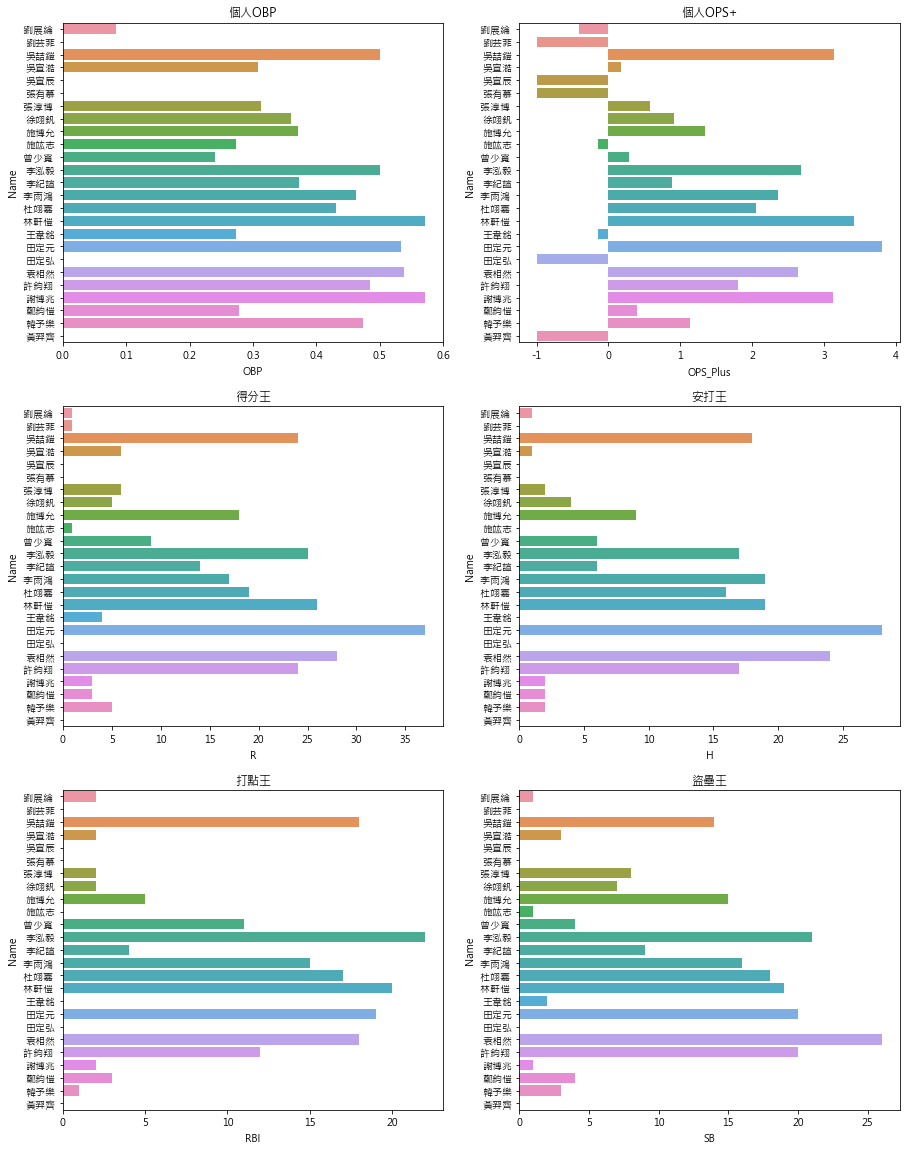

In [97]:
import seaborn as sns

fig=plt.figure(figsize=[15,20])
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

sns.barplot(x="OBP", y="Name", data=U12_aggbat01,ax=ax1).set(title='個人OBP')
sns.barplot(x="OPS_Plus", y="Name", data=U12_aggbat01,ax=ax2).set(title='個人OPS+')
sns.barplot(x="R", y="Name", data=U12_aggbat01,ax=ax3).set(title='得分王')
sns.barplot(x="H", y="Name", data=U12_aggbat01,ax=ax4).set(title='安打王')
sns.barplot(x="RBI", y="Name", data=U12_aggbat01,ax=ax5).set(title='打點王')
sns.barplot(x="SB", y="Name", data=U12_aggbat01,ax=ax6).set(title='盜壘王')

#但需要特別注意PA的數據喔

### [課堂作業].鍵盤總教練換你當2
- 你各位阿。我幫你把U10/U12的球員show出來了
- 上表需要特別注意PA喔
- 請再重新排排棒次，你會怎麼排? 關鍵代打是誰? 關鍵代跑是誰?

># Part 3: 投手篇

## 3-1.資料整理與aggregate

In [126]:
U12_Pit = pd.read_excel("data/U12_Pitch.xlsx") #這是U12球員投球成績
U10_Pit = pd.read_excel("data/U10_Pitch.xlsx") #這是U10球員投球成績

In [55]:
print(U12_Pit.shape)
print(U10_Pit.shape)

(87, 39)
(54, 39)


In [57]:
U10_Pit.sample(n=10)   #隨機抽取10筆數據出來看看

,ID,Name,Level,date,VSTeam,Start,G,W,L,SV,...,H/GI,HB,BK,WP,HR,GO,AO,FPS,FPB,FPS%
17,43,鄭鈞愷,U10,2021-12-11,Monga,NaN,1,0,0,0,...,17.5,0,0,0,0,2,1,7.0,6.0,0.538
13,35,施竑志,U10,2022-06-11,小小馬,NaN,1,0,0,0,...,13.5,1,0,0,1,2,2,NaN,NaN,NaN
40,59,張淳博,U10,2022-08-07,火山,1.0,1,0,1,0,...,7.0,1,0,0,1,3,0,15.0,7.0,0.682
23,50,黃羿齊,U10,2021-10-30,小小馬,1.0,1,0,1,0,...,31.5,0,0,0,0,4,0,4.0,12.0,0.250
48,83,黃仕樂,U10,2022-06-18,親子勇士,NaN,1,0,0,0,...,0.0,0,0,5,0,2,0,NaN,NaN,NaN
6,25,施昶宇,U10,2022-07-02,WBC,NaN,1,0,0,0,...,0.0,0,0,1,0,0,1,NaN,NaN,NaN
14,43,鄭鈞愷,U10,2021-10-30,敦化,1.0,1,1,0,0,...,7.0,0,0,0,0,2,1,9.0,4.0,0.692
25,50,黃羿齊,U10,2021-12-11,小小馬,NaN,1,0,0,0,...,0.0,0,0,0,0,1,1,1.0,2.0,0.333
8,35,施竑志,U10,2021-11-13,Monga,1.0,1,0,1,0,...,17.5,2,0,0,0,3,2,6.0,8.0,0.429
10,35,施竑志,U10,2021-12-11,小小馬,NaN,1,0,0,0,...,35.0,0,0,0,1,3,0,7.0,1.0,0.875


In [151]:
U10_Pit.describe()

,ID,Start,G,W,L,SV,IP,BF,Ball,Str,...,H/GI,HB,BK,WP,HR,GO,AO,FPS,FPB,FPS%
count,54.000000,22.0,54.0,54.00000,54.000000,54.0,54.000000,54.000000,29.000000,29.000000,...,50.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,29.000000,29.000000,29.000000
mean,50.907407,1.0,1.0,0.12963,0.277778,0.0,1.654259,10.351852,16.068966,23.137931,...,17.467930,0.333333,0.037037,0.870370,0.185185,1.87037,0.851852,6.103448,4.827586,0.564172
std,19.590399,0.0,0.0,0.33905,0.452109,0.0,1.054059,5.270629,8.344934,10.531328,...,16.676487,0.614295,0.190626,1.671586,0.478759,1.50529,1.105858,3.086200,2.988896,0.194683
min,1.000000,1.0,1.0,0.00000,0.000000,0.0,0.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.188000
25%,37.000000,1.0,1.0,0.00000,0.000000,0.0,1.000000,7.000000,9.000000,18.000000,...,6.250000,0.000000,0.000000,0.000000,0.000000,0.25000,0.000000,4.000000,3.000000,0.429000
50%,50.000000,1.0,1.0,0.00000,0.000000,0.0,2.000000,9.000000,16.000000,21.000000,...,12.750000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,6.000000,4.000000,0.545000
75%,59.000000,1.0,1.0,0.00000,1.000000,0.0,2.000000,14.000000,22.000000,30.000000,...,23.625000,1.000000,0.000000,1.000000,0.000000,3.00000,1.000000,8.000000,7.000000,0.682000
max,93.000000,1.0,1.0,1.00000,1.000000,0.0,5.000000,25.000000,31.000000,52.000000,...,67.500000,3.000000,1.000000,6.000000,2.000000,6.00000,4.000000,15.000000,13.000000,1.000000


In [127]:
#老規矩，要來做aggregate
U10_aggPit = U10_Pit.groupby('Name').agg({'Start':'sum', 
                         'G':'sum', 
                         'W':'sum', 
                         'L':'sum',
                          'SV':'sum',
                          'IP':'sum',
                          'BF':'sum',
                          'Ball':'sum',
                          'Str':'sum',
                          'PIT':'sum',
                          'R':'sum',
                          'ER':'sum',
                          'K':'sum',
                          'Kc':'sum',
                          'Ks':'sum',
                          'H':'sum',
                          'BB':'sum',
                          'IBB':'sum', 
                           'GO':'sum',
                          'AO':'sum',
                          'BK':'sum',
                          'HR':'sum'  }).reset_index()

U10_aggPit.shape

(11, 23)

In [59]:
U10_aggPit.head()

,Name,Start,G,W,L,SV,IP,BF,Ball,Str,...,K,Kc,Ks,H,BB,IBB,GO,AO,BK,HR
0,劉展綸,0.0,1,0,0,0,0.00,2,0.0,0.0,...,0,0,0,0,2,0,0,0,0,0
1,張淳博,8.0,11,4,4,0,26.00,150,150.0,213.0,...,43,11,32,39,23,0,22,12,0,5
2,施昶宇,1.0,5,0,1,0,4.00,34,27.0,30.0,...,4,2,2,9,10,0,5,2,1,0
3,施竑志,3.0,7,1,2,0,11.33,73,59.0,96.0,...,6,3,3,23,6,0,19,8,0,2
4,王睿謙,0.0,1,0,0,0,1.00,8,0.0,0.0,...,1,0,1,5,2,0,0,0,0,2


In [128]:
#同理，把U12的也做一做

U12_aggPit = U12_Pit.groupby('Name').agg({'Start':'sum', 
                         'G':'sum', 
                         'W':'sum', 
                         'L':'sum',
                          'SV':'sum',
                          'IP':'sum',
                          'BF':'sum',
                          'Ball':'sum',
                          'Str':'sum',
                          'PIT':'sum',
                          'R':'sum',
                          'ER':'sum',
                          'K':'sum',
                          'Kc':'sum',
                          'Ks':'sum',
                          'H':'sum',
                          'BB':'sum',
                          'IBB':'sum', 
                           'GO':'sum',
                          'AO':'sum',
                          'BK':'sum',
                          'HR':'sum'  }).reset_index()

U12_aggPit.shape

(14, 23)

In [129]:
#順便教一下把整理好的dataframe存出來，以後就不用每次都要整理，很煩

U12_aggPit.to_csv('output/U12_aggPit.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8
U10_aggPit.to_csv('output/U10_aggPit.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

## 3-2. 相關投手指標計算


### [投手的參考數值]
- 優質先發是棒球作家John Lowe在1985年提出的基準，認為「一個先發投手主投6局失3分就是一場合格的先發」，在這樣的前提下，優質先發的基準是投滿六局以上，單場比賽自責分率4.5，也就是6局失3分、8局失4分都算是一次合格的先發。
- 投手概略上我們除了勝投、敗投、防禦率之外，大體上還會看下列數據
    - 勝率(WPCT.): 勝場 ÷ （勝場 + 敗場） 
    - 每局被上壘率(WHIP)的公式是：( 安打 + 四壞球 ) ÷ 投球局數，在這個公式裡不含故意四壞
    - ERA:責失分÷所投局數×6 (因為少棒打6局)
    - 好壞球比（Strike percentage，S%）：( 好球數 ÷ ( 總投球數 - 好球數 ) )
    - 滾飛比(GO/AO):GO/AO


### 3-2-1. U10投手

In [130]:
U10_aggPit01 = pd.read_csv("output/U10_aggPit.csv") #讀取.csv

In [131]:
#我們先來看看基本數據所能告訴我們的那些"王"

U10_aggPit01.loc[:,["Name","G","W","L","SV","IP","PIT","K"]] 
#.loc是用來選擇特定的[(index名稱),(columns名稱)]
#所以你可以看出":"是將index列出 

,Name,G,W,L,SV,IP,PIT,K
0,劉展綸,1,0,0,0,0.00,0.0,0
1,張淳博,11,4,4,0,26.00,363.0,43
2,施昶宇,5,0,1,0,4.00,57.0,4
3,施竑志,7,1,2,0,11.33,155.0,6
4,王睿謙,1,0,0,0,1.00,0.0,1
5,許彥鵬,3,0,0,0,4.33,25.0,4
6,許立霖,1,0,0,0,0.00,0.0,0
7,鄭鈞愷,9,1,2,0,17.67,249.0,23
8,陳諭辰,4,0,1,0,3.66,25.0,7
9,黃仕樂,3,1,1,0,6.00,36.0,12


#### <font color="blue">不需要說甚麼，都是張淳博....</font>

In [132]:
U10_aggPit01["WPCT"] = U10_aggPit01.W / (U10_aggPit01.W+U10_aggPit01.L)
U10_aggPit01["WHIP"] = (U10_aggPit01.H + U10_aggPit01.BB)  / +U10_aggPit01.IP
U10_aggPit01["ERA"] = U10_aggPit01.ER / U10_aggPit01.IP *6  
U10_aggPit01["Strike_percentage"] = (U10_aggPit01.Str / (U10_aggPit01.PIT - U10_aggPit01.Str))
U10_aggPit01["GOAO"] = U10_aggPit01.GO / U10_aggPit01.AO    

U10_aggPit02=U10_aggPit01.loc[:,["Name","G","W","L","IP","K","BB",
                                 "WPCT","WHIP","ERA","Strike_percentage","GOAO" ]] 
U10_aggPit02.sort_values(by=["IP"], ascending=False) #按照IP，由大排到小

#若出現inf表示為無限大

,Name,G,W,L,IP,K,BB,WPCT,WHIP,ERA,Strike_percentage,GOAO
1,張淳博,11,4,4,26.00,43,23,0.500000,2.384615,4.615385,1.420000,1.833333
7,鄭鈞愷,9,1,2,17.67,23,6,0.333333,2.716469,9.168081,1.766667,2.500000
10,黃羿齊,9,0,4,15.34,16,18,0.000000,2.672751,8.604954,1.063636,2.333333
3,施竑志,7,1,2,11.33,6,6,0.333333,2.559576,10.591350,1.627119,2.375000
9,黃仕樂,3,1,1,6.00,12,2,0.500000,1.166667,9.000000,4.142857,inf
5,許彥鵬,3,0,0,4.33,4,0,NaN,1.616628,8.314088,2.571429,0.800000
2,施昶宇,5,0,1,4.00,4,10,0.000000,4.750000,18.000000,1.111111,2.500000
8,陳諭辰,4,0,1,3.66,7,7,0.000000,5.191257,14.754098,0.562500,1.000000
4,王睿謙,1,0,0,1.00,1,2,NaN,7.000000,30.000000,NaN,NaN
0,劉展綸,1,0,0,0.00,0,2,NaN,inf,inf,NaN,NaN


### [小結]
- 可以看出IP>10的投手，
    - WHIP皆大於2。但從投球局數 IP來看，BB過高，每一局平均都投出一個四壞的比例太高
    - ERA第一名(低)與其他選手有顯著差異
    - 張淳博是接近優質先發的候選人
    - 鄭鈞愷是滾地球小王子。滾飛比2.5
    - 施紘志的控球很好，好球率(Strike percentage)1.627; 11.33局投出6個BB
- IP<10的投手
    - 陳諭辰的好球率太低，導致WHIP偏高
    - 施昶宇的滾飛比(2.5)很好，但BB太高導致WHIP偏高
    - 許彥鵬好球率(Strike percentage)2.57很漂亮，也沒有任何BB，表示控球不錯，但滾飛比0.8顯然是台發球機

In [133]:
#我們可以從上表看出有兩位選手的ERA 是無限大，因此我無法計算整隊的ERA
print('U10總失分為',U10_Pit.ER.sum()) #總失分
print('U10總局數為',U10_Pit.IP.sum()) #總局數

print('U10團隊ERA為',U10_Pit.IP.sum()/ U10_Pit.IP.sum() *6 ) #團隊ERA

U10總失分為 134
U10總局數為 89.33
U10團隊ERA為 6.0


In [134]:
#投手三圍。有點類似打者的「打擊三圍」
#會以奪三振、予四壞、被全壘打這樣的順序排列，
#    - 其公式為：三振（或四壞、或全壘打） ÷ 總投球局數 * 9
#    - 在這裡，我們的計算方式是以每場6局計算(少棒)


U10_aggPit01["K_Per"] = U10_aggPit01.K / U10_aggPit01.IP *6  #每六局奪三振
U10_aggPit01["BB_Per"] = U10_aggPit01.BB / U10_aggPit01.IP *6 #每六局投出四壞球
U10_aggPit01["HR_Per"] = U10_aggPit01.HR / U10_aggPit01.IP *6  #每六局被全壘打
U10_aggPit01["ERA_Plus"] = 6 / U10_aggPit01.ERA *100

U10_aggPit02=U10_aggPit01.loc[:,["Name","G","W","L","IP","K","BB",
                                 "WPCT","WHIP","ERA","Strike_percentage","GOAO",
                                "K_Per","BB_Per","HR_Per","ERA_Plus" ]] 
U10_aggPit02.sort_values(by=["IP"], ascending=False) #按照IP，由大排到小
      

,Name,G,W,L,IP,K,BB,WPCT,WHIP,ERA,Strike_percentage,GOAO,K_Per,BB_Per,HR_Per,ERA_Plus
1,張淳博,11,4,4,26.00,43,23,0.500000,2.384615,4.615385,1.420000,1.833333,9.923077,5.307692,1.153846,130.000000
7,鄭鈞愷,9,1,2,17.67,23,6,0.333333,2.716469,9.168081,1.766667,2.500000,7.809847,2.037351,0.339559,65.444444
10,黃羿齊,9,0,4,15.34,16,18,0.000000,2.672751,8.604954,1.063636,2.333333,6.258149,7.040417,0.000000,69.727273
3,施竑志,7,1,2,11.33,6,6,0.333333,2.559576,10.591350,1.627119,2.375000,3.177405,3.177405,1.059135,56.650000
9,黃仕樂,3,1,1,6.00,12,2,0.500000,1.166667,9.000000,4.142857,inf,12.000000,2.000000,0.000000,66.666667
5,許彥鵬,3,0,0,4.33,4,0,NaN,1.616628,8.314088,2.571429,0.800000,5.542725,0.000000,0.000000,72.166667
2,施昶宇,5,0,1,4.00,4,10,0.000000,4.750000,18.000000,1.111111,2.500000,6.000000,15.000000,0.000000,33.333333
8,陳諭辰,4,0,1,3.66,7,7,0.000000,5.191257,14.754098,0.562500,1.000000,11.475410,11.475410,0.000000,40.666667
4,王睿謙,1,0,0,1.00,1,2,NaN,7.000000,30.000000,NaN,NaN,6.000000,12.000000,12.000000,20.000000
0,劉展綸,1,0,0,0.00,0,2,NaN,inf,inf,NaN,NaN,NaN,inf,NaN,0.000000


In [135]:

U10_aggPit02.to_csv('output/U10_aggPit02.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

In [163]:
U10_aggPit02_modified=U10_aggPit02.set_index("Name") #將原始的index設定為以 Name為index

In [164]:
print('U10防禦率王:',U10_aggPit02_modified.ERA.idxmin(),'/防禦率為:',U10_aggPit02_modified.ERA.min())#取小值
print('U10三振王:' ,U10_aggPit02_modified.K_Per.idxmax() ,'/安打數為:',U10_aggPit02_modified.K_Per.max())
print('U10每局被上壘率王:',U10_aggPit02_modified.WHIP.idxmin(),'/WHIP為:',U10_aggPit02_modified.WHIP.min())#取小值
print('U10勝率王:',U10_aggPit02_modified.WPCT.idxmax(),'/WPCT為:',U10_aggPit02_modified.WPCT.max())

print('U10滾地球小王子:',U10_aggPit02_modified.GOAO.idxmax(),'/滾飛比為:',U10_aggPit02_modified.GOAO.max())
print('U10控球王:',U10_aggPit02_modified.BB_Per.idxmin(),'/四壞球率為:',U10_aggPit02_modified.BB_Per.min())#取小值
print('U10 ERA+最高者為:',U10_aggPit02_modified.ERA_Plus.idxmax(),'/ERA+為:',U10_aggPit02_modified.ERA_Plus.max())#取大值

U10防禦率王: 張淳博  /防禦率為: 4.615384615384616
U10三振王: 黃仕樂 /安打數為: 12.0
U10每局被上壘率王: 黃仕樂 /WHIP為: 1.1666666666666667
U10勝率王: 張淳博  /WPCT為: 0.5
U10滾地球小王子: 黃仕樂 /滾飛比為: inf
U10控球王: 許彥鵬 /四壞球率為: 0.0
U10 ERA+最高者為: 張淳博  /ERA+為: 129.99999999999997


### 3-2-2. U12投手

In [136]:
U12_aggPit01 = pd.read_csv("output/U12_aggPit.csv") #讀取.csv

In [137]:
#我們先來看看基本數據所能告訴我們的那些"王"

U12_aggPit01.loc[:,["Name","G","W","L","SV","IP","PIT","K"]] 
#.loc是用來選擇特定的[(index名稱),(columns名稱)]
#所以你可以看出":"是將index列出 

,Name,G,W,L,SV,IP,PIT,K
0,李雨鴻,13,2,6,0,25.33,182.0,24
1,林軒愷,5,0,1,0,1.32,30.0,1
2,袁相然,16,3,2,0,24.68,193.0,49
3,吳喆鎧,6,0,0,0,11.00,47.0,6
4,張淳博,1,1,0,0,2.00,47.0,4
5,施博允,1,0,0,0,0.33,14.0,0
6,曾少寬,11,4,4,0,32.01,329.0,21
7,李泓毅,18,6,3,0,39.32,377.0,54
8,李紀諠,2,0,0,0,1.33,32.0,1
9,杜翊嘉,1,0,0,0,0.67,11.0,1


In [138]:

print('U12總失分為',U12_Pit.ER.sum()) #總失分
print('U12總局數為',U12_Pit.IP.sum()) #總局數

print('U12團隊ERA為',U12_Pit.IP.sum()/ U12_Pit.IP.sum() *6 ) #團隊ERA

U12總失分為 105
U12總局數為 156.32
U12團隊ERA為 6.0


In [139]:
U12_aggPit01["WPCT"] = U12_aggPit01.W / (U12_aggPit01.W+U12_aggPit01.L)
U12_aggPit01["WHIP"] = (U12_aggPit01.H + U12_aggPit01.BB)  / +U12_aggPit01.IP
U12_aggPit01["ERA"] = U12_aggPit01.ER / U12_aggPit01.IP *6  
U12_aggPit01["Strike_percentage"] = (U12_aggPit01.Str / (U12_aggPit01.PIT - U12_aggPit01.Str))
U12_aggPit01["GOAO"] = U12_aggPit01.GO / U12_aggPit01.AO

U12_aggPit01["K_Per"] = U12_aggPit01.K / U12_aggPit01.IP *6
U12_aggPit01["BB_Per"] = U12_aggPit01.BB / U12_aggPit01.IP *6
U12_aggPit01["HR_Per"] = U12_aggPit01.HR / U12_aggPit01.IP *6  
U12_aggPit01["ERA_Plus"] = 6 / U12_aggPit01.ERA *100

U12_aggPit02=U12_aggPit01.loc[:,["Name","G","W","L","IP","K","BB","WPCT",
                                 "WHIP","ERA","Strike_percentage","GOAO",
                                "K_Per","BB_Per","HR_Per","ERA_Plus"]] 
U12_aggPit02.sort_values(by=["IP"], ascending=False) #按照IP，由大排到小

,Name,G,W,L,IP,K,BB,WPCT,WHIP,ERA,Strike_percentage,GOAO,K_Per,BB_Per,HR_Per,ERA_Plus
7,李泓毅,18,6,3,39.32,54,30,0.666667,1.271617,1.220753,1.448052,1.291667,8.240081,4.577823,0.000000,491.500000
6,曾少寬,11,4,4,32.01,21,23,0.500000,1.749453,3.748828,1.550388,2.227273,3.936270,4.311153,0.562324,160.050000
0,李雨鴻,13,2,6,25.33,24,36,0.250000,2.447690,6.869325,1.275000,1.368421,5.684959,8.527438,0.473747,87.344828
2,袁相然,16,3,2,24.68,49,33,0.600000,1.863857,4.619125,0.949495,1.750000,11.912480,8.022690,0.000000,129.894737
11,許鈞翔,10,3,1,14.67,15,11,0.750000,2.317655,4.089980,1.620690,1.888889,6.134969,4.498978,0.000000,146.700000
3,吳喆鎧,6,0,0,11.00,6,6,NaN,1.454545,3.272727,1.611111,4.200000,3.272727,3.272727,0.000000,183.333333
12,鄭鈞愷,1,0,1,3.00,0,1,0.000000,2.000000,8.000000,NaN,8.000000,0.000000,2.000000,0.000000,75.000000
4,張淳博,1,1,0,2.00,4,3,1.000000,1.500000,3.000000,1.043478,inf,12.000000,9.000000,0.000000,200.000000
8,李紀諠,2,0,0,1.33,1,1,NaN,2.255639,13.533835,0.882353,inf,4.511278,4.511278,0.000000,44.333333
1,林軒愷,5,0,1,1.32,1,11,0.000000,9.090909,4.545455,0.764706,1.000000,4.545455,50.000000,0.000000,132.000000


In [140]:
U12_aggPit02.to_csv('output/U12_aggPit02.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

In [171]:
U12_aggPit02_modified=U12_aggPit02.set_index("Name") #將原始的index設定為以 Name為index

In [172]:
print('U12防禦率王:',U12_aggPit02_modified.ERA.idxmin(),'/防禦率為:',U12_aggPit02_modified.ERA.min())#取小值
print('U12三振王:' ,U12_aggPit02_modified.K_Per.idxmax() ,'/安打數為:',U12_aggPit02_modified.K_Per.max())
print('U12每局被上壘率王:',U12_aggPit02_modified.WHIP.idxmin(),'/WHIP為:',U12_aggPit02_modified.WHIP.min())#取小值
print('U12勝率王:',U12_aggPit02_modified.WPCT.idxmax(),'/WPCT為:',U12_aggPit02_modified.WPCT.max())

print('U12滾地球小王子:',U12_aggPit02_modified.GOAO.idxmax(),'/滾飛比為:',U12_aggPit02_modified.GOAO.max())
print('U12控球王:',U12_aggPit02_modified.BB_Per.idxmin(),'/四壞球率為:',U12_aggPit02_modified.BB_Per.min())#取小值
print('U12 ERA+最高者為:',U12_aggPit02_modified.ERA_Plus.idxmax(),'/ERA+為:',U12_aggPit02_modified.ERA_Plus.max())#取大值
#需要特別注意IP

U12防禦率王: 杜翊嘉 /防禦率為: 0.0
U12三振王: 韓予樂 /安打數為: 18.18181818181818
U12每局被上壘率王: 杜翊嘉 /WHIP為: 0.0
U12勝率王: 張淳博 /WPCT為: 1.0
U12滾地球小王子: 張淳博 /滾飛比為: inf
U12控球王: 杜翊嘉 /四壞球率為: 0.0
U12 ERA+最高者為: 杜翊嘉 /ERA+為: inf


### [課堂練習] 鍵盤總教練3
- 本次資料區間為2021.08-2022.08，在9月份開始，張淳博離開、施紘志與鄭鈞愷升上五年級
- 請問該年度12月份的諸羅山盃，誰是U10的先發投手? 關鍵時候你會派誰當Closer關門?

># Part 3: 守備篇

- 近來常常看到許多人在討論防守數據，尤其是進階防守數據，
    - 例如UZR: 意義是"比同守備位置的聯盟平均選手"多為球隊省下或丟掉幾分
    - David Pinto的PMR 。
- 但傳統社區少棒區缺少進階數據、同時少棒階段經常更換守備位置，故在範圍及守位不固定下，難以計算
- 因此我們單純以守備率為計算基準
- Fielding Percentage = (A+PO)/(A+PO+E), 其中A是助殺，PO是刺殺，E是失誤，所以我們知道，失誤越多的，守備率越低。


In [141]:
U12_Def = pd.read_excel("data/U12_def.xlsx") #這是U12球員守備成績
U10_Def = pd.read_excel("data/U10_def.xlsx") #這是U10球員守備成績


## 3-1. U12守備率

In [142]:
#只看守備率，我們只需要: A是助殺，PO是刺殺，E是失誤
U12_aggDef = U12_Def.groupby('Name').agg({ 'G':'sum',
                         'ERR':'sum', 
                         'PO':'sum', 
                         'A':'sum' }).reset_index() #加入reset_index()是為了將index保留(Name)

U12_aggDef.shape

(25, 5)

In [143]:
U12_aggDef["FP"] = (U12_aggDef.A + U12_aggDef.PO) / (U12_aggDef.A + U12_aggDef.PO + U12_aggDef.ERR) #守備率

U12_aggDef.sort_values(by=["G"], ascending=False) #按照G，由大排到小

,Name,G,ERR,PO,A,FP
14,杜翊嘉,31,2,14,6,0.909091
19,袁相然,30,6,49,19,0.918919
13,李雨鴻,30,9,16,13,0.763158
20,許鈞翔,30,11,16,32,0.813559
17,田定元,29,9,7,19,0.742857
8,施博允,29,4,8,1,0.692308
15,林軒愷,28,9,73,13,0.905263
12,李紀諠,28,2,3,8,0.846154
11,李泓毅,26,6,53,12,0.915493
2,吳喆鎧,26,5,29,8,0.880952


## 3-2.U10守備率

In [144]:
U10_aggDef = U10_Def.groupby('Name').agg({ 'G':'sum',
                         'ERR':'sum', 
                         'PO':'sum', 
                         'A':'sum' }).reset_index() #加入reset_index()是為了將index保留(Name)

U10_aggDef.shape

(21, 5)

In [145]:
U10_aggDef["FP"] = (U10_aggDef.A + U10_aggDef.PO) / (U10_aggDef.A + U10_aggDef.PO + U10_aggDef.ERR) #守備率

U10_aggDef.sort_values(by=["G"], ascending=False) #按照G，由大排到小

,Name,G,ERR,PO,A,FP
20,黃羿齊,20,0,18,12,1.000000
5,張淳博,18,3,23,18,0.931818
17,鄭鈞淏,18,0,0,2,1.000000
16,鄭鈞愷,18,0,50,14,1.000000
6,施昶宇,18,3,2,3,0.625000
0,劉展綸,18,7,21,3,0.774194
3,吳宣辰,18,1,8,2,0.909091
4,張有慕,17,0,41,2,1.000000
12,王睿謙,15,1,1,5,0.857143
7,施竑志,14,1,16,9,0.961538


In [146]:
U12_aggDef.to_csv('output/U12_aggDef.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8
U10_aggDef.to_csv('output/U10_aggDef.csv', index=False,encoding='utf_8_sig') #將存出來的字型指定為utf8

># Part 4: 團練重不重要?

- 我們看完了投打守數據，各有各的好，但其實，練習是很重要的
- 我們都知道MVP的選擇方式非常多元，在賽伯計量學中有 WAR（Wins Avobe Replacement）作為依據，能夠總和打擊、防守和跑壘各方面的貢獻，但各家公司給予的加權和算法就不一樣，因此會出現同一個數據卻不同數值的狀況。

wOBA算法
- (0.690×uBB+0.722×HBP+0.888×1B+1.271×2B+1.616×3B+2.101×HR)÷(AB+BB-IBB+SF+HBP)。
- 其中,uBB是非故意四壞球保送,HBP是觸身球,而IBB則是故意四壞,SF是高飛犧牲打。

wRAA公式如下：(球員wOBA-聯盟wOBA)÷1.277×球員打席


### <font color="red">尷尬了，我們沒有那麼多數據可以算WAR....</font>

### <font color="red">也許可以計算團練出席率跟關鍵指標之間的相關係數.</font>、<font color="#FF0000">



## 4-1. 關鍵變數Merge

In [147]:
U10_Att = pd.read_excel("data/U10_Attendance.xlsx") #這是U10球員出席紀錄
U12_Att = pd.read_excel("data/U12_Attendance.xlsx") #這是U12球員出席紀錄

display(U10_Att.shape, 
        U12_Att.shape) #了解整個 dataframe的資料範圍

(22, 4)

(25, 4)

我們整理一下，剛剛前三個Part，我們整理了投打守三種數據，但是分散在不同的表格，我們可不可以把關鍵指標會整成同一個dataframe? 我們用U12來測試一下
- 打擊:U12_aggbat02: "G","AB,"AVG","OBP","SLG","OPS","OPS_Plus"
- 投手 U12_aggPit02: "WHIP","ERA","GOAO","K_Per","ERA_Plus" 
- 守備 U12_aggDef: FP 

In [148]:
# 我們把所需要的dataframe叫進來
U12_aggPit02 = pd.read_csv("output/U12_aggPit02.csv") #讀取.csv
U10_aggPit02 = pd.read_csv("output/U10_aggPit02.csv") #讀取.csv

U10_aggbat02 = pd.read_csv("output/U10_aggbat02.csv") #讀取.csv
U12_aggbat02 = pd.read_csv("output/U12_aggbat02.csv") #讀取.csv

U10_aggDef = pd.read_csv("output/U10_aggDef.csv") #讀取.csv
U12_aggDef = pd.read_csv("output/U12_aggDef.csv") #讀取.csv

In [149]:
display(U12_aggbat02.sample(10), 
        U12_aggPit02.sample(10), 
         U12_aggDef.sample(10)) #抽樣 dataframe

,Name,G,PA,AB,R,H,RBI,SB,TB,AVG,OBP,SLG,OPS,OPS_Plus,BB_per
8,李雨鴻,30,69,55,17,19,15,16,27,0.345455,0.462687,0.490909,0.953596,2.360029,0.173913
10,李紀諠,28,51,38,14,6,4,9,7,0.157895,0.372549,0.184211,0.556760,0.887377,0.254902
5,吳喆鎧,27,70,47,24,18,18,14,31,0.382979,0.500000,0.659574,1.159574,3.131293,0.157143
23,吳宣辰,2,1,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
20,田定弘,1,1,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
21,劉芸菲,4,2,1,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
11,施博允,31,59,43,18,9,5,15,13,0.209302,0.370370,0.302326,0.672696,1.338325,0.186441
17,施竑志,13,13,8,1,0,0,1,0,0.000000,0.272727,0.000000,0.272727,-0.141016,0.230769
3,田定元,31,80,62,37,28,19,20,50,0.451613,0.534247,0.806452,1.340698,3.808448,0.137500
0,林軒愷,30,69,46,26,19,20,19,31,0.413043,0.571429,0.673913,1.245342,3.411841,0.246377


,Name,G,W,L,IP,K,BB,WPCT,WHIP,ERA,Strike_percentage,GOAO,K_Per,BB_Per,HR_Per,ERA_Plus
11,許鈞翔,10,3,1,14.67,15,11,0.750000,2.317655,4.089980,1.620690,1.888889,6.134969,4.498978,0.000000,146.700000
7,李泓毅,18,6,3,39.32,54,30,0.666667,1.271617,1.220753,1.448052,1.291667,8.240081,4.577823,0.000000,491.500000
4,張淳博,1,1,0,2.00,4,3,1.000000,1.500000,3.000000,1.043478,inf,12.000000,9.000000,0.000000,200.000000
13,韓予樂,1,0,0,0.33,1,5,NaN,15.151515,36.363636,0.333333,NaN,18.181818,90.909091,0.000000,16.500000
1,林軒愷,5,0,1,1.32,1,11,0.000000,9.090909,4.545455,0.764706,1.000000,4.545455,50.000000,0.000000,132.000000
3,吳喆鎧,6,0,0,11.00,6,6,NaN,1.454545,3.272727,1.611111,4.200000,3.272727,3.272727,0.000000,183.333333
12,鄭鈞愷,1,0,1,3.00,0,1,0.000000,2.000000,8.000000,NaN,8.000000,0.000000,2.000000,0.000000,75.000000
10,田定元,1,0,0,0.33,0,2,NaN,12.121212,18.181818,0.500000,inf,0.000000,36.363636,0.000000,33.000000
9,杜翊嘉,1,0,0,0.67,1,0,NaN,0.000000,0.000000,1.200000,inf,8.955224,0.000000,0.000000,inf
6,曾少寬,11,4,4,32.01,21,23,0.500000,1.749453,3.748828,1.550388,2.227273,3.936270,4.311153,0.562324,160.050000


,Name,G,ERR,PO,A,FP
0,劉展綸,8,0,0,0,NaN
23,韓予樂,9,0,4,0,1.000000
21,謝博兆,3,0,0,1,1.000000
10,曾少寬,24,4,6,17,0.851852
16,王韋銘,8,1,0,1,0.500000
6,張淳博,11,3,4,9,0.812500
1,劉芸菲,4,0,0,1,1.000000
22,鄭鈞愷,11,2,18,5,0.920000
24,黃羿齊,2,0,0,0,NaN
17,田定元,29,9,7,19,0.742857


In [93]:
#我們先看一下上述三個表格的shape
display(U12_aggbat02.shape, 
        U12_aggPit02.shape, 
         U12_aggDef.shape) #了解整個 dataframe的資料範圍

(21, 13)

(14, 16)

(25, 5)

### 決定以 U10_aggDef當成基準去merge其他兩個表
### merge的參數

- on：列名，join用來對齊的那一列的名字，用到這個參數的時候一定要保證左表和右表用來對齊的那一列都有相同的列名。
- left_on：左表對齊的列，可以是列名，也可以是和dataframe同樣長度的arrays。
- right_on：右表對齊的列，可以是列名，也可以是和dataframe同樣長度的arrays。
- left_index/ right_index: 如果是True的haunted以index作為對齊的key
- how：數據融合的方法。
- sort：根據dataframe合併的keys按字典順序排序，默認是，如果置false可以提高表現。

<img src="images/join-or-merge-in-python-pandas-1.png" width="70%">

In [155]:
#第一次merge
U12_merge01 = pd.merge(U12_aggbat02,
                 U12_aggDef[['Name','FP']],
                 on='Name', how='left')
U10_merge01 = pd.merge(U10_aggbat02,
                 U10_aggDef[['Name','FP']],
                 on='Name', how='left')

U12_merge01.sample(10)

,Name,G,PA,AB,R,H,RBI,SB,TB,AVG,OBP,SLG,OPS,OPS_Plus,BB_per,FP
2,袁相然,30,68,54,28,24,18,26,27,0.444444,0.538462,0.500000,1.038462,2.633926,0.161765,0.918919
9,杜翊嘉,32,72,57,19,16,17,18,25,0.280702,0.430556,0.438596,0.869152,2.056067,0.208333,0.909091
1,謝博兆,3,7,5,3,2,2,1,3,0.400000,0.571429,0.600000,1.171429,3.125356,0.285714,1.000000
14,吳宣澔,18,27,19,6,1,2,3,1,0.052632,0.307692,0.052632,0.360324,0.173108,0.259259,1.000000
23,吳宣辰,2,1,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,NaN
5,吳喆鎧,27,70,47,24,18,18,14,31,0.382979,0.500000,0.659574,1.159574,3.131293,0.157143,0.880952
11,施博允,31,59,43,18,9,5,15,13,0.209302,0.370370,0.302326,0.672696,1.338325,0.186441,0.692308
12,徐翊釩,16,27,20,5,4,2,7,4,0.200000,0.360000,0.200000,0.560000,0.909052,0.185185,NaN
15,鄭鈞愷,12,20,15,3,2,3,4,2,0.133333,0.277778,0.133333,0.411111,0.391687,0.150000,0.920000
3,田定元,31,80,62,37,28,19,20,50,0.451613,0.534247,0.806452,1.340698,3.808448,0.137500,0.742857


In [156]:
#第二次merge
U12_merge02 = pd.merge(U12_merge01,
                 U12_aggPit02[['Name','WHIP','ERA','GOAO','K_Per','ERA_Plus']],
                 on='Name', how='left')
U10_merge02 = pd.merge(U10_merge01,
                 U10_aggPit02[['Name','WHIP','ERA','GOAO','K_Per','ERA_Plus']],
                 on='Name', how='left')

U12_merge02.tail()

,Name,G,PA,AB,R,H,RBI,SB,TB,AVG,...,SLG,OPS,OPS_Plus,BB_per,FP,WHIP,ERA,GOAO,K_Per,ERA_Plus
20,田定弘,1,1,1,0,0,0,0,0,0.0,...,0.0,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21,劉芸菲,4,2,1,1,0,0,0,0,0.0,...,0.0,0.0,-1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
22,張有慕,2,4,4,0,0,0,0,0,0.0,...,0.0,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23,吳宣辰,2,1,1,0,0,0,0,0,0.0,...,0.0,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24,黃羿齊,1,1,1,0,0,0,0,0,0.0,...,0.0,0.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
#第三次merge
U12_merge03 = pd.merge(U12_merge02,
                 U12_Att[['Name', 'Attendance']],
                 on='Name', how='left')
U10_merge03 = pd.merge(U10_merge02,
                 U10_Att[['Name', 'Attendance']],
                 on='Name', how='left')

display(U12_merge03.sample(10),
        U12_merge03.shape, 
        U12_merge03.info() 
         ) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        25 non-null     object 
 1   G           25 non-null     int64  
 2   PA          25 non-null     int64  
 3   AB          25 non-null     int64  
 4   R           25 non-null     int64  
 5   H           25 non-null     int64  
 6   RBI         25 non-null     int64  
 7   SB          25 non-null     int64  
 8   TB          25 non-null     int64  
 9   AVG         25 non-null     float64
 10  OBP         25 non-null     float64
 11  SLG         25 non-null     float64
 12  OPS         25 non-null     float64
 13  OPS_Plus    25 non-null     float64
 14  BB_per      25 non-null     float64
 15  FP          18 non-null     float64
 16  WHIP        11 non-null     float64
 17  ERA         11 non-null     float64
 18  GOAO        9 non-null      float64
 19  K_Per       11 non-null     flo

,Name,G,PA,AB,R,H,RBI,SB,TB,AVG,...,OPS,OPS_Plus,BB_per,FP,WHIP,ERA,GOAO,K_Per,ERA_Plus,Attendance
22,張有慕,2,4,4,0,0,0,0,0,0.000000,...,0.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.510204
6,許鈞翔,32,71,52,24,17,12,20,17,0.326923,...,0.812217,1.795629,0.225352,0.813559,2.317655,4.089980,1.888889,6.134969,146.7,0.921569
17,施竑志,13,13,8,1,0,0,1,0,0.000000,...,0.272727,-0.141016,0.230769,NaN,NaN,NaN,NaN,NaN,NaN,0.854167
3,田定元,31,80,62,37,28,19,20,50,0.451613,...,1.340698,3.808448,0.137500,0.742857,12.121212,18.181818,inf,0.000000,33.0,0.755556
15,鄭鈞愷,12,20,15,3,2,3,4,2,0.133333,...,0.411111,0.391687,0.150000,0.920000,2.000000,8.000000,8.000000,0.000000,75.0,0.907407
16,王韋銘,8,11,8,4,0,0,2,0,0.000000,...,0.272727,-0.141016,0.272727,0.500000,NaN,NaN,NaN,NaN,NaN,0.162791
14,吳宣澔,18,27,19,6,1,2,3,1,0.052632,...,0.360324,0.173108,0.259259,1.000000,NaN,NaN,NaN,NaN,NaN,0.744681
21,劉芸菲,4,2,1,1,0,0,0,0,0.000000,...,0.000000,-1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.702703
4,李泓毅,26,62,48,25,17,22,21,26,0.354167,...,1.041667,2.674286,0.225806,0.915493,1.271617,1.220753,1.291667,8.240081,491.5,0.692308
7,韓予樂,10,19,12,5,2,1,3,2,0.166667,...,0.640351,1.137914,0.368421,1.000000,15.151515,36.363636,NaN,18.181818,16.5,0.777778


(25, 22)

None

## 4-2.團練出席率之相關係數

### 相關係數範圍
- 相關係數的值介於–1與+1之間，即–1≤r≤+1。
- |r|<0.4為低度線性相關
- 0.4≤|r|<0.7為中度相關
- 0.7≤|r|<1為高度線性相關

In [158]:
U12_merge03.corr() #相關係數矩陣

,G,PA,AB,R,H,RBI,SB,TB,AVG,OBP,...,OPS,OPS_Plus,BB_per,FP,WHIP,ERA,GOAO,K_Per,ERA_Plus,Attendance
G,1.000000,0.973719,0.969574,0.870881,0.833195,0.819354,0.871046,0.775728,0.718352,0.722464,...,0.723723,0.719927,0.427734,-0.207692,-0.295236,-0.340382,-0.894392,-0.504039,0.077863,0.198266
PA,0.973719,1.000000,0.993897,0.941223,0.925064,0.906805,0.922320,0.884396,0.811235,0.750982,...,0.804224,0.804826,0.374245,-0.176842,-0.160376,-0.321323,-0.803948,-0.451549,0.163900,0.160246
AB,0.969574,0.993897,1.000000,0.927143,0.922340,0.904459,0.916078,0.875225,0.796871,0.721772,...,0.778713,0.779797,0.336771,-0.189170,-0.174367,-0.351637,-0.919082,-0.453622,0.185782,0.167929
R,0.870881,0.941223,0.927143,1.000000,0.969208,0.915711,0.947841,0.949717,0.855726,0.754402,...,0.846377,0.850353,0.330411,-0.173173,0.090343,-0.156342,-0.685067,-0.383792,0.196499,0.042677
H,0.833195,0.925064,0.922340,0.969208,1.000000,0.941819,0.942449,0.972777,0.877093,0.720437,...,0.840292,0.846893,0.236163,-0.117652,0.085601,-0.219753,-0.642205,-0.355043,0.210286,0.067420
RBI,0.819354,0.906805,0.904459,0.915711,0.941819,1.000000,0.896653,0.926229,0.840232,0.691740,...,0.814662,0.821687,0.238894,0.002228,-0.169042,-0.477974,-0.721836,-0.243675,0.584928,0.083760
SB,0.871046,0.922320,0.916078,0.947841,0.942449,0.896653,1.000000,0.875439,0.843603,0.747231,...,0.804726,0.805721,0.337539,-0.140013,-0.161735,-0.344727,-0.631831,-0.244472,0.401036,0.072798
TB,0.775728,0.884396,0.875225,0.949717,0.972777,0.926229,0.875439,1.000000,0.846846,0.686392,...,0.840167,0.849923,0.204943,-0.133616,0.161405,-0.145720,-0.466555,-0.362878,0.163605,0.042607
AVG,0.718352,0.811235,0.796871,0.855726,0.877093,0.840232,0.843603,0.846846,1.000000,0.887721,...,0.971894,0.974466,0.438400,0.108558,0.136568,-0.174328,-0.482396,-0.235713,0.290993,0.128591
OBP,0.722464,0.750982,0.721772,0.754402,0.720437,0.691740,0.747231,0.686392,0.887721,1.000000,...,0.946673,0.936595,0.795514,0.043693,0.410922,0.201156,-0.446250,0.160207,0.163322,0.017585


Text(0.5, 1.0, 'Correlation Heatmap')

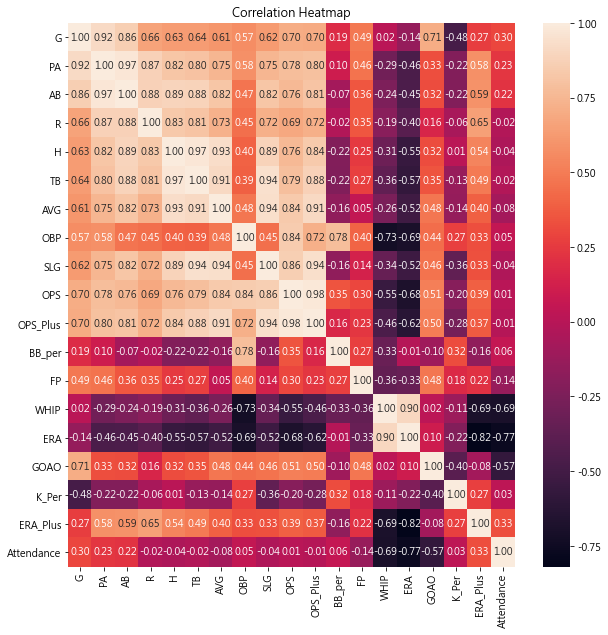

In [159]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(U10_merge03.corr(),  annot=True,fmt=".2f") #U10相關係數熱區圖
heatmap.set_title('Correlation Heatmap')

### 根據相關係數，我們採取中度相關0.4≤|r|<0.7 以上為依據
- U10團練出席率與 WHIP呈現負相關(-0.69)，顯示團練出席率越高，WHIP越低
- U10團練出席率與 ERA呈現負相關(-0.77)，顯示團練出席率越高，ERA越低
- U12團練出席率與 FP呈現正相關(0.47)，顯示團練出席率越高，FP越高


># 附件